# Unsupervised Learning: Trade&Ahead

**Marks: 60**

Estimated Notebook Runtime: 2m 19s

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. 

There are a lot of compelling reasons to invest in stocks. 

It can help in fighting inflation, create wealth, and also provides some tax benefits. 

Good steady returns on investments over a long period of time can also grow a lot more than seems possible. 

Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. 

Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. 

Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. 

It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. 

By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. 

This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. 

They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. 

They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [201]:
import numpy as np
import pandas as pd
data = pd.read_csv('../data/stock_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [202]:
object_list=[]
for col in data.columns:
    if data[col].dtype == 'object':
        object_list.append(col)
        # data = data.fillna(data.mode().iloc[0])

In [203]:
object_list

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

## Importing necessary libraries

In [204]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

runtime of above: ~ 5.1 to 52.6 s

In [205]:
# ChatGPT3 recommended libraries:
from scipy.spatial.distance import pdist, squareform

# https://docs.xlwings.org/en/latest/jupyternotebooks.html
from xlwings import view
from xlwings import load

## Loading the dataset

In [206]:
## Complete the code to import the data
data = pd.read_csv('../data/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [207]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [208]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector   
102           DVN           Devon Energy Corp.                  Energy  \
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change   
102  Oil & Gas Exploration & Production      32.000000    -15.478079  \
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income   
102    2.923698  205          70      830000000 -14454000000  \
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

### Checking the data types of the columns for the dataset

In [209]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [210]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [211]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [212]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [213]:
df.describe(include='all').T

count unique   
Ticker Symbol                   340    340  \
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq   
Ticker Symbol                                                AAL    1  \
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std   
Ticker Symbol                               NaN                NaN  \
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%   
Ticker Symbol                           NaN          NaN          NaN  \
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

Tabnine/GitHub CoPilot assisted sentence completion in the next couple of markdown cells.:

Having run the statistical summary of the data above, using the `describe()` method, 

(and .T to transpose the dataframe for better readability),

we can observe the following:

1. What immediately stands out is that the are a number of NaN (Not a Number) values in the dataset.

- However, upon closer inspection, we can see that the NaN values are present in the first four columns that are not numerical in nature.

We have already earmarked these 4 features and passed them to object_list for ease of reference, as follows:

In [214]:
object_list

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

Continuing from previous, markdown cell:

2. The next most obvious thing is that for the 3 columns:
    - unique
    - top and
    - freq
    all the numeric columns have NaN values.

    However, once again, this can be explained as not applicable to numerical columns.

- Other notes are that count is an integer for object columns, and a float for numeric columns.

- Price Change, Net Cash Flow and Net Income have negative values, which is not an issue as these values can indeed be negative.

- P/B Ratio has at least one negative value, however, from:

[What is the Price to Book Ratio (P/B Ratio)?](https://www.freshbooks.com/en-gb/hub/accounting/price-to-book-ratio#:~:text=a%20particular%20stock.-,What%20Does%20a%20Negative%20Price%20to%20Book%20Ratio%20Mean%3F,automatically%20bad%20news%20for%20investors.) :

"A negative book value means that a company has more total liabilities than assets."

Which is mathematically possible and so not an issue with the data.

## Exploratory Data Analysis

### Univariate analysis

---

#### matplotlib.pyplot.subplots / plt.subplots

For the univariate analysis:
histogram boxplot was used.

The first line of code in the function starts with:

`f2, (ax_box2, ax_hist2) = plt.subplots(`

Here is the documentation for [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

which states that the purpose of the method is to:

"Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.



##### Returns:

`fig` : 
        Figure

`ax` :
**Axes** or array of **Axes**
- `ax` can be either :
    - a single **Axes** object, or 
    - an array of **Axes** objects
        - if more than one **subplot** was created. 
    - The dimensions of the resulting array can be controlled with 
        - the `squeeze` keyword, see above.

- Typical idioms for handling the return value are:

===================================================

```
# using the variable ax for single a Axes
fig, ax = plt.subplots()

# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
```

(The names `ax` and pluralized `axs` 
- are preferred over axes because for the latter 
    - it's not clear if it refers to:
        - a single Axes instance or
        - a collection of these.
)

#### end of notes on matplotlib.pyplot.subplots / plt.subplots

---

#### seaborn notes:

#### sns.boxplot

Reference: [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

```
seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
```


from VSCode mouseover function popup:

```
(function) def boxplot(
    data: Any | None = None,
    *,
    x: Any | None = None,
    y: Any | None = None,
    hue: Any | None = None,
    order: Any | None = None,
    hue_order: Any | None = None,
    orient: Any | None = None,
    color: Any | None = None,
    palette: Any | None = None,
    saturation: float = 0.75,
    width: float = 0.8,
    dodge: bool = True,
    fliersize: int = 5,
    linewidth: Any | None = None,
    whis: float = 1.5,
    ax: Any | None = None,
    **kwargs: Any
) -> Any
```

Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

================================================================================

#### sns.histplot

Reference: [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

```
seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
```


from VSCode mouseover function popup:

```
(function) def histplot(
    data: Any | None = None,
    *,
    x: Any | None = None,
    y: Any | None = None,
    hue: Any | None = None,
    weights: Any | None = None,
    stat: str = "count",
    bins: str = "auto",
    binwidth: Any | None = None,
    binrange: Any | None = None,
    discrete: Any | None = None,
    cumulative: bool = False,
    common_bins: bool = True,
    common_norm: bool = True,
    multiple: str = "layer",
    element: str = "bars",
    fill: bool = True,
    shrink: int = 1,
    kde: bool = False,
    kde_kws: Any | None = None,
    line_kws: Any | None = None,
    thresh: int = 0,
    pthresh: Any | None = None,
    pmax: Any | None = None,
    cbar: bool = False,
    cbar_ax: Any | None = None,
    cbar_kws: Any | None = None,
    palette: Any | None = None,
    hue_order: Any | None = None,
    hue_norm: Any | None = None,
    color: Any | None = None,
    log_scale: Any | None = None,
    legend: bool = True,
    ax: Any | None = None,
    **kwargs: Any
) -> Any
```

Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

More information is provided in the user guide.

#### end of notes on seaborn

---

##### matplotlib.pyplot.axvline

present in code as: `ax_hist2.axvline`

Reference:   --  | [matplotlib.pyplot.axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

Template:  ##  | `matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)`

Description:   -| Add a vertical line across the Axes.

##### Parameters:
x
float, default: 0
x position in data coordinates of the vertical line.

ymin
float, default: 0
Should be between 0 and 1, 0 being the bottom of the plot, 1 the top of the plot.

ymax
float, default: 1
Should be between 0 and 1, 0 being the bottom of the plot, 1 the top of the plot.



##### Returns:
Line2D

Other Parameters:
**kwargs
Valid keyword arguments are Line2D properties, except for 'transform':

**Property**    | #  |   **Description**

color or c   | #  |   color

linestyle or ls |   {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}





---

In [215]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### histogram_boxplots:

output format: histogram with a single thin boxplot above to summarise the distribution.

**`Current Price`**

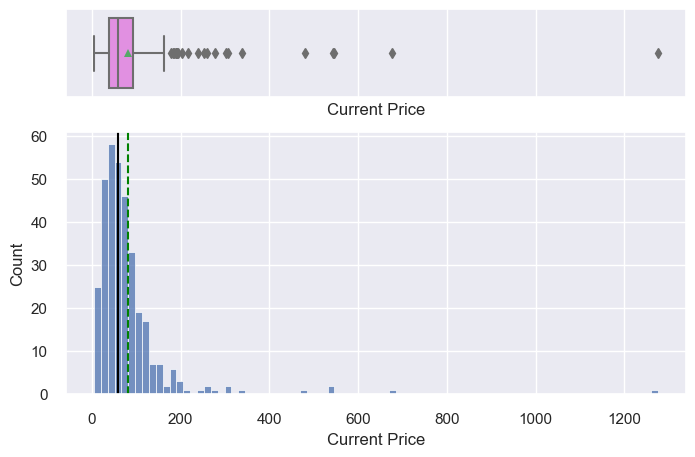

In [216]:
histogram_boxplot(df, 'Current Price')

**`Price Change`**

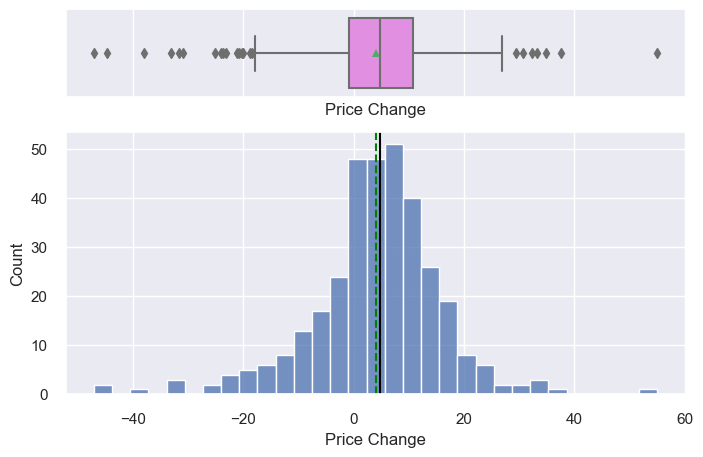

In [217]:
histogram_boxplot(df, 'Price Change')  ## Complete the code to create histogram_boxplot for 'Price Change'

**`Volatility`**

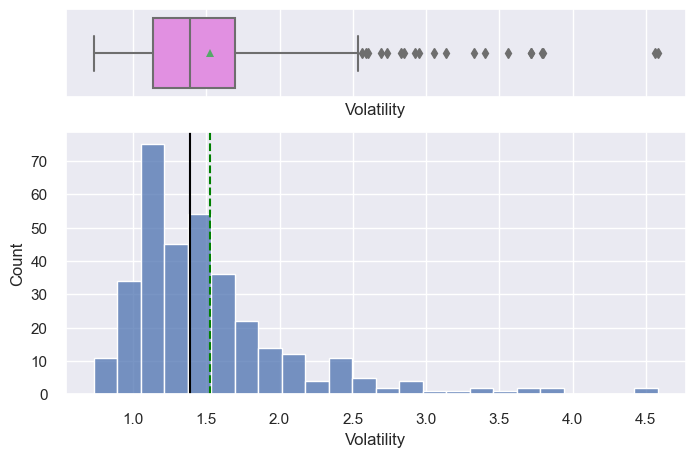

In [218]:
histogram_boxplot(df=df,feature='Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'

**`ROE`**

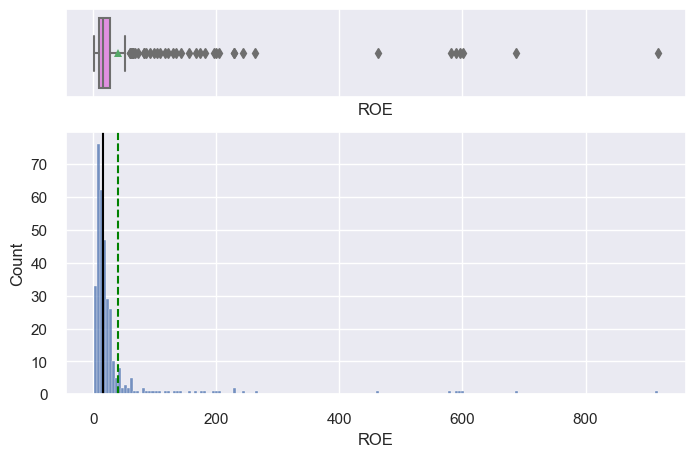

In [219]:
histogram_boxplot(df=df,feature='ROE')  ## Complete the code to create histogram_boxplot for 'ROE'

**`Cash Ratio`**

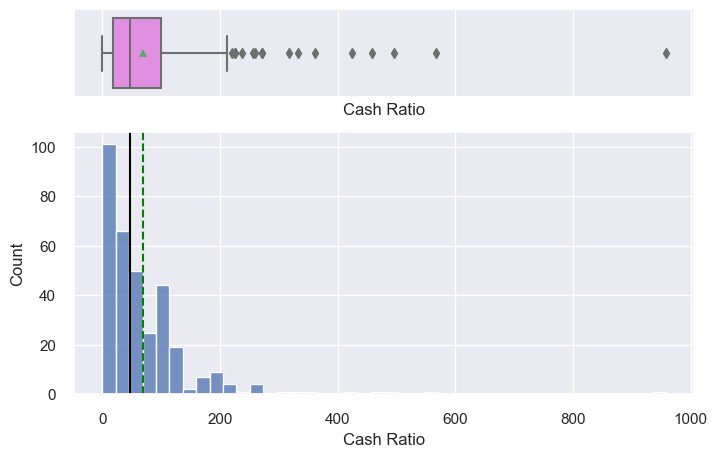

In [220]:
histogram_boxplot(df=df,feature='Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

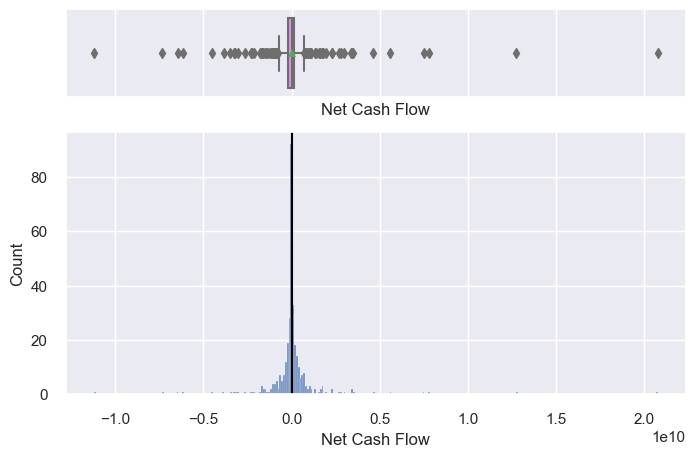

In [221]:
histogram_boxplot(df=df,feature='Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

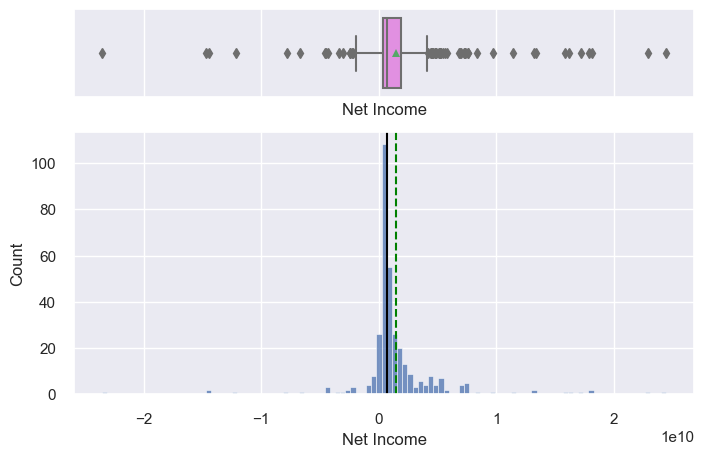

In [222]:
histogram_boxplot(df=df,feature='Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

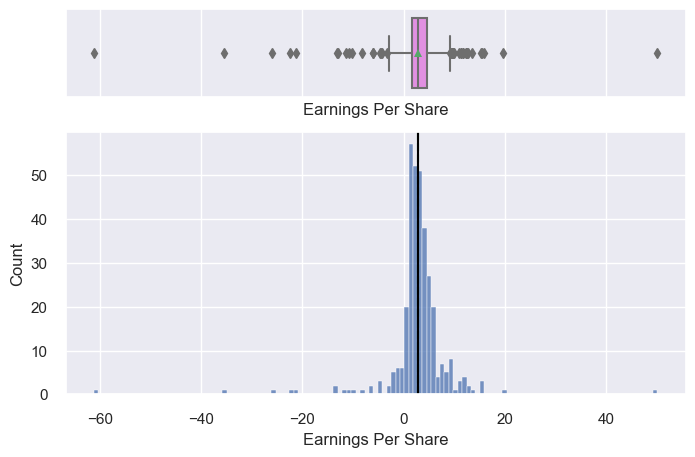

In [223]:
histogram_boxplot(df=df,feature='Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

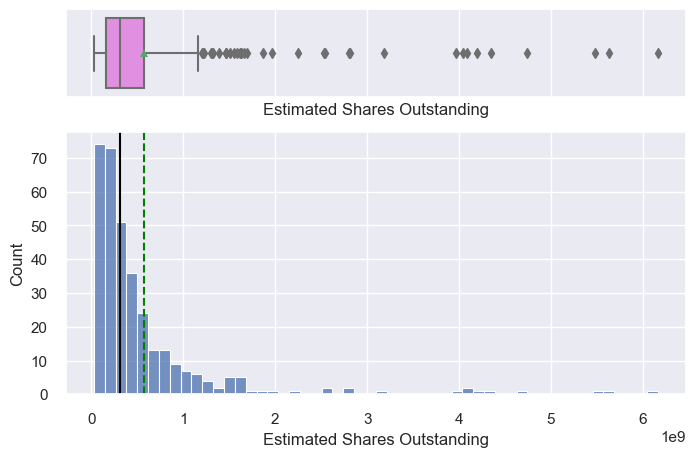

In [224]:
histogram_boxplot(df=df,feature='Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

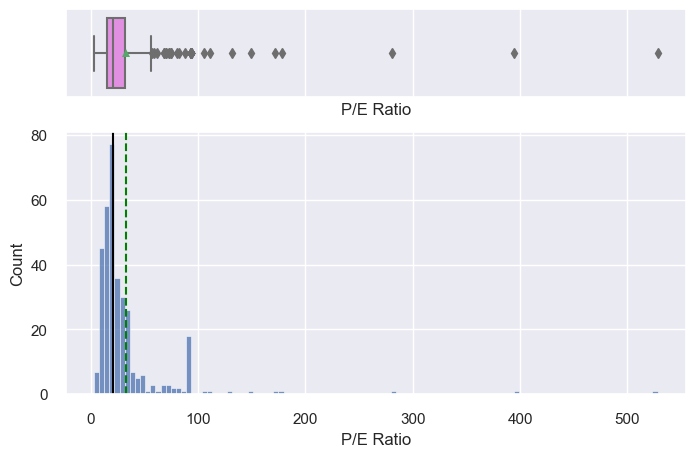

In [225]:
histogram_boxplot(df=df,feature='P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

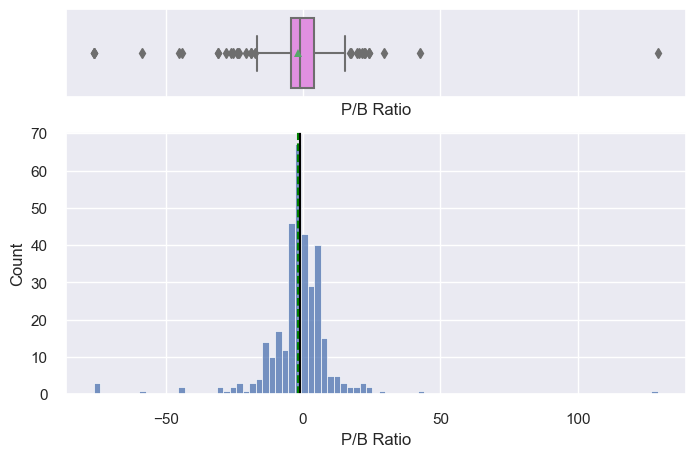

In [226]:
histogram_boxplot(df=df,feature='P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

#### end of histogram_boxplots

In [227]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None, figsize=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if figsize==None:
        if n is None:
            plt.figure(figsize=(count + 1, 5))
        else:
            plt.figure(figsize=(n + 1, 5))
    else:
        plt.figure(figsize=figsize)
    plt.xticks(rotation=90, fontsize=14)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### labeled_barplots

**`GICS Sector`**

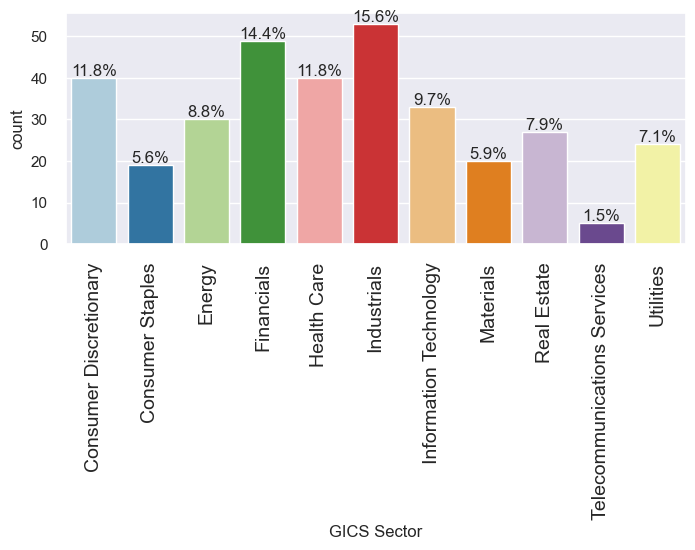

In [228]:
labeled_barplot(df, 'GICS Sector', perc=True, figsize=(8,3))

[pandas.DataFrame.sort_values | Documentation  | pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

#### pandas.DataFrame.sort_values
DataFrame.sort_values(
    
                        by,

                        *,
                        
                        axis=0, 
                        
                        ascending=True, 
                        
                        inplace=False, 
                        
                        kind='quicksort', 
                        
                        na_position='last', 
                        
                        ignore_index=False, 
                        
                        key=None)

Sort by the values along either axis. (axis=0 or 1)

---



#### Parameters:

by : 
     
     str or list of str

          Name or list of names to sort by.

          - if axis is 0 or ‘index’ then by may contain index levels and/or column labels.

          - if axis is 1 or ‘columns’ then by may contain column levels and/or index labels.

---

axis : 
          
          {0 or ‘index’, 1 or ‘columns’}, default 0
               
               Axis to be sorted.
---
ascending : 

               bool or list of bool, default True

                    Sort ascending vs. descending. Specify list for multiple sort orders. If this is a list of bools, must match the length of the by.
---


inplace : 

            bool, default False
            
                If True, perform operation in-place.
---

kind : 

        {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, default ‘quicksort’

            Choice of sorting algorithm. See also numpy.sort() for more information. 
            
            mergesort and stable are the only stable algorithms. 
            
            For DataFrames, this option is only applied when sorting on a single column or label.
---



na_position :

                {‘first’, ‘last’}, default ‘last’
                    
                    Puts NaNs at the beginning if first; last puts NaNs at the end.

---

ignore_index :

                bool, default False
                
                    If True, the resulting axis will be labeled 0, 1, …, n - 1.
---

na_position : 
                
                {‘first’, ‘last’}, default ‘last’
                    
                    Puts NaNs at the beginning if first; last puts NaNs at the end.

---

ignore_index : 
    
                bool, default False
                    
                    If True, the resulting axis will be labeled 0, 1, …, n - 1.
---


key : 

        callable, optional

            Apply the key function to the values before sorting. This is similar to the key argument in the builtin sorted() function, with the notable difference that this key function should be vectorized. It should expect a Series and return a Series with the same shape as the input. It will be applied to each column in by independently.

---

Returns

        DataFrame or None


            DataFrame with sorted values or None if inplace=True.

---

See also

        DataFrame.sort_index

            Sort a DataFrame by the index.

        Series.sort_values

            Similar method for a Series.

**`GICS Sub Industry`**

In [229]:
sub_ind_order_counts=df['GICS Sub Industry'].sort_values(inplace=False).value_counts()

In [230]:
sub_ind_order_counts.head(8)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Banks                                 10
Name: count, dtype: int64

In [231]:
df_GICS=df.copy()

In [232]:
# sub_ind_order_counts=df['GICS Sub Industry'].sort_values(inplace=False).value_counts()

df_GICS_sorted=df_GICS['GICS Sub Industry'].sort_values().value_counts()

In [233]:
df_GICS.sort_values(by=['GICS Sub Industry'],inplace=True)

In [234]:
df_GICS_sorted.head(10)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: count, dtype: int64

In [235]:
type(df_GICS_sorted)

pandas.core.series.Series

References: 
1. (unused) df to Series [How to Convert Pandas DataFrame to a Series](https://datatofish.com/pandas-dataframe-to-series/)
2. (used) Series to df `Series.to_frame(name=_NoDefault.no_default)` [pandas.Series.to_frame](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)



In [236]:
# Note1: convert pandas Series to DataFrame using above reference 2.

# operates on df_GICS_sorted Series

# which is a sorted copy of df
    # sorted for the purpose of getting a sorted plot when fed into 
        # labeled_barplot plotting function

df_GICS_sorted.to_frame().head(10)

count
GICS Sub Industry                        
Oil & Gas Exploration & Production     16
REITs                                  14
Industrial Conglomerates               14
Internet Software & Services           12
Electric Utilities                     12
MultiUtilities                         11
Health Care Equipment                  11
Banks                                  10
Property & Casualty Insurance           8
Diversified Financial Services          7

In [237]:
df_GICS_sorted.head(10)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: count, dtype: int64

In [238]:
df_GICS_sorted_to_df=df_GICS_sorted.to_frame()

In [239]:
type(df_GICS_sorted)

pandas.core.series.Series

In [240]:
type(df_GICS_sorted_to_df)

pandas.core.frame.DataFrame

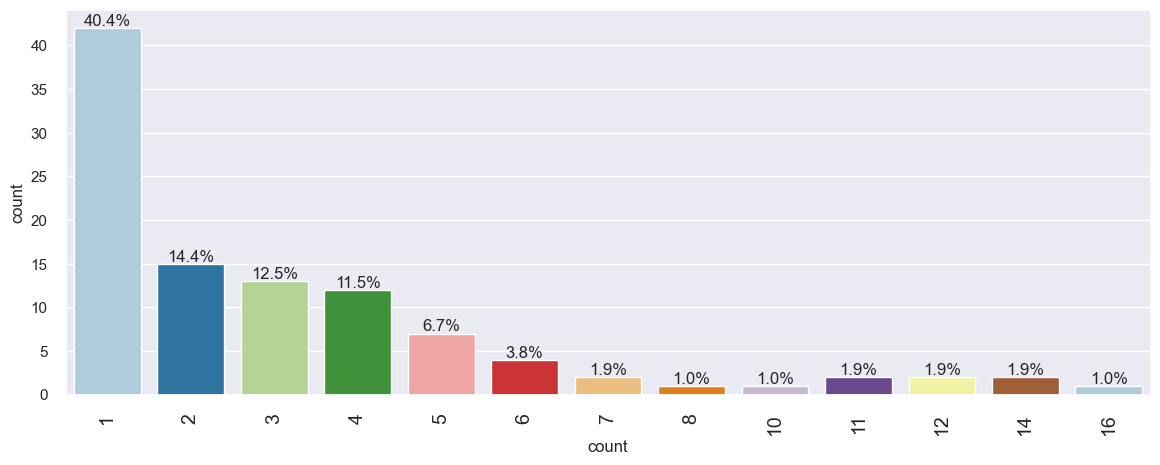

In [241]:
labeled_barplot(df_GICS_sorted_to_df.sort_values(by=['count']), feature='count', perc=True)

In [242]:
df.sample(10)

Ticker Symbol                     Security             GICS Sector   
233           NWL                Newell Brands  Consumer Discretionary  \
144          GRMN                  Garmin Ltd.  Consumer Discretionary   
232           NUE                  Nucor Corp.               Materials   
157           HPE   Hewlett Packard Enterprise  Information Technology   
87             DD               Du Pont (E.I.)               Materials   
246           PFE                  Pfizer Inc.             Health Care   
220           MYL                   Mylan N.V.             Health Care   
116           ETN            Eaton Corporation             Industrials   
178           KIM                 Kimco Realty             Real Estate   
89            DFS  Discover Financial Services              Financials   

                              GICS Sub Industry  Current Price  Price Change   
233                    Housewares & Specialties      44.080002      9.980039  \
144                        Consumer Electronics      37.169998      3.393594   
232                                       Steel      40.299999      6.585554   
157  Technology Hardware, Storage & Peripherals      15.200000    -17.837838   
87                        Diversified Chemicals      66.599998     37.489677   
246                             Pharmaceuticals      32.279999      3.130991   
220                             Pharmaceuticals      54.070000     33.177346   
116                    Industrial Conglomerates      52.040001      1.166411   
178                                       REITs      26.459999      8.709938   
89                             Consumer Finance      53.619999      3.653584   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income   
233    1.641300   19          14       75400000   350000000  \
144    1.665475   14         121     -363198000   456227000   
232    1.460619    5         147      915325000   357659000   
157    3.400491    7          45     7523000000  2461000000   
87     1.577881   20          60    -1610000000  1953000000   
246    1.238748   11          79      298000000  6960000000   
220    2.299304    9          30     1010500000   847600000   
116    1.521430   13          10     -513000000  1979000000   
178    1.224688   18          47        2212000   894115000   
89     1.159897   20          99     2288000000  2297000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
233                1.30                  2.692308e+08  33.907694  -2.075543  
144                2.39                  1.908900e+08  15.552300   5.760057  
232                1.11                  3.222153e+08  36.306305  11.168107  
157                1.80                  5.139877e+08  25.309524   3.954975  
87                 2.17                  9.000000e+08  30.691243   3.252222  
246                1.13                  6.159292e+09  28.566371  -4.213309  
220                1.58                  1.633016e+09  33.430380  -4.213309  
116                4.25                  4.656471e+08  12.244706  -8.639591  
178                2.01                  4.448333e+08  13.164179  -1.269332  
89                 5.14                  4.468872e+08  10.431906  -0.375934

1. create a DataFrame from df which has:
2. - count of companies in each GICS Sub Industry
3.     - order from highest to lowest count
4. - plot labeled_barplot of the above

In [243]:
df_3=df.copy()
df_3.head(2) # DataFrame

Ticker Symbol                 Security  GICS Sector GICS Sub Industry   
0           AAL  American Airlines Group  Industrials          Airlines  \
1          ABBV                   AbbVie  Health Care   Pharmaceuticals   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   
0      42.349998      9.999995    1.687151  135          51     -604000000  \
1      59.240002      8.339433    2.197887  130          77       51000000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio   
0  7610000000               11.39                  6.681299e+08   3.718174  \
1  5144000000                3.15                  1.633016e+09  18.806350   

   P/B Ratio  
0  -8.784219  
1  -8.750068

Reference: [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [244]:
lookup_table=df_3['GICS Sub Industry'].value_counts()

In [245]:
lookup_table.head(4)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Name: count, dtype: int64

In [246]:
# from def labeled_barplot(df, feature, perc=False, n=None)
# use:
# sns.countplot
# plt.show()
def labeled_barplot_2(df, feature, perc=False, n=None):
    
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    
    sns.countplot(data=df_3, x='GICS Sub Industry', palette="Paired", order=df_3['GICS Sub Industry'].value_counts().index)
    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage


    plt.show()


want to use labeled_barplot_2() function to plot a barplot,
whereby the lookup_table is consulted
to get the order of the bars in the barplot

In [247]:
# rewrite labeled_barplot_2() function to use lookup_table
def labeled_barplot_3(df, feature, lookup_table, perc=False, n=None):
    
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    
    sns.countplot(data=df_3, x='GICS Sub Industry', palette="Paired", order=df_3['GICS Sub Industry'].value_counts().index)
    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=lookup_table.index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage


    plt.show()

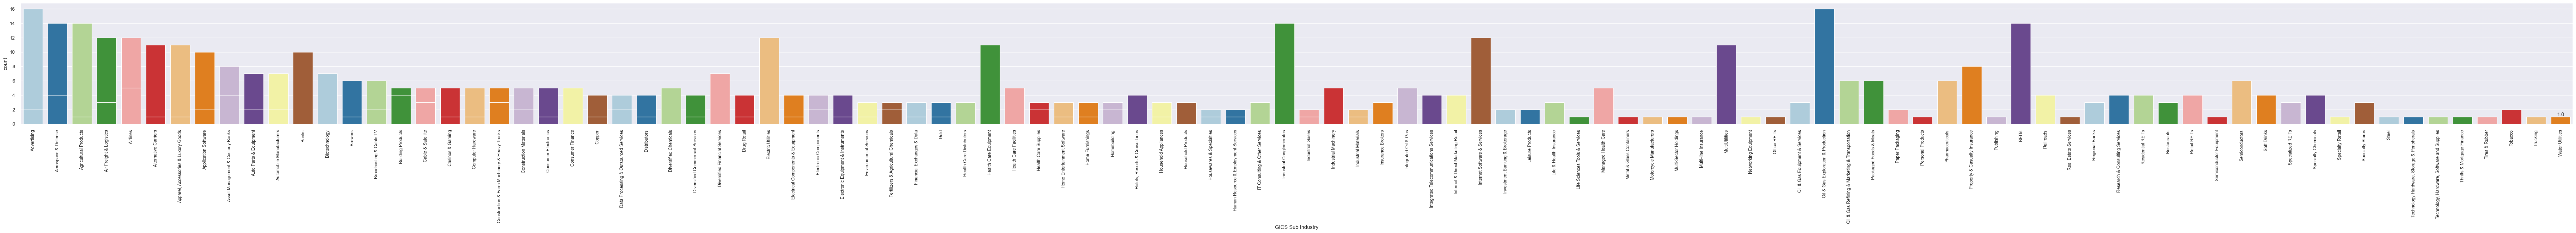

In [248]:
# call labeled_barplot_3() function to plot a barplot,
# whereby the lookup_table is consulted
# to get the order of the bars in the barplot

labeled_barplot_3(df=df_3, feature='GICS Sub Industry', lookup_table=lookup_table)

TabNine and GitHub Copilot assisted in figuring out how to order labeled barplot bars by count of companies in each 'GCIS Sub Industry' Subsector.

In [249]:
df_3['GICS Sub Industry'].value_counts().index[:10].sort_values()

Index(['Banks', 'Diversified Financial Services', 'Electric Utilities',
       'Health Care Equipment', 'Industrial Conglomerates',
       'Internet Software & Services', 'MultiUtilities',
       'Oil & Gas Exploration & Production', 'Property & Casualty Insurance',
       'REITs'],
      dtype='object', name='GICS Sub Industry')

In [250]:
df_3['GICS Sub Industry']

0                          Airlines
1                   Pharmaceuticals
2             Health Care Equipment
3              Application Software
4                    Semiconductors
                   ...             
335    Internet Software & Services
336                     Restaurants
337           Health Care Equipment
338                  Regional Banks
339                 Pharmaceuticals
Name: GICS Sub Industry, Length: 340, dtype: object

In [251]:
# rewrite labeled_barplot_4 to include descending parameter
# and incorporate simple logic used in simple fruit example from ChatGPT3,
# but use our stocks DataFrame instead of the fruit DataFrame:
def labeled_barplot_5(df_3, feature, lookup_table, perc=False, n=None, descending=False):
    total = len(df_3['GCIS Sub Industry'])  # length of the column
    count = df_3['GCIS Sub Industry'].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    
    sns.countplot(data=df_3, x='GICS Sub Industry', palette="Paired", order=df_3['GICS Sub Industry'].value_counts().index)
    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=df_3,
        x='GICS Sub Industry',
        palette="Paired",
        order=lookup_table.index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage


    plt.show()

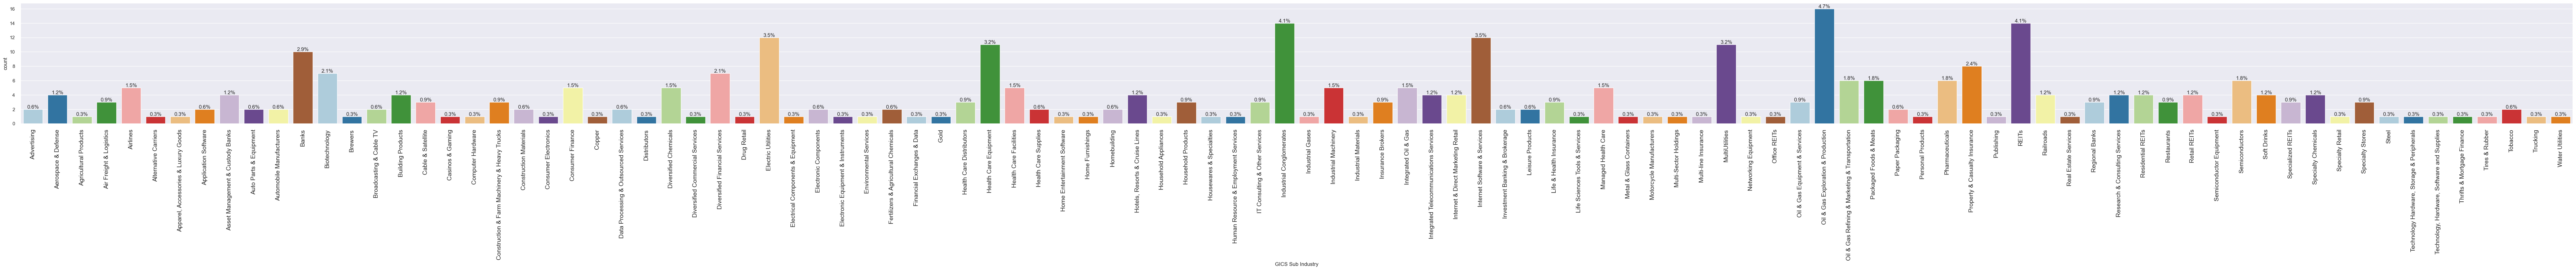

In [252]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

In [253]:
type(sub_ind_order_counts)

pandas.core.series.Series

In [254]:
# labeled_barplot(sub_ind_order_counts, 'GCIS Sub Industry')

From ChatGPT3:

Q/ I was wondering om python: how to use sns.countplot on df to plot in descending order based not on a feature directly of the df but on counts of unque value in that feature

A/ Sure! You can use the value_counts() method in Pandas to count the number of occurrences of each unique value in the column of interest, and then use that to sort the order of the bars in your Seaborn countplot.

Here's an example of how to do it:

```
df = pd.DataFrame({
    'fruit': ['apple', 'banana', 'apple', 'orange', 'banana', 'banana', 'kiwi']
})

# Count the number of occurrences of each unique value in the 'fruit' column
fruit_counts = df['fruit'].value_counts()

# Sort the order of the bars in the countplot based on the counts of each unique value
sns.countplot(x='fruit', data=df, order=fruit_counts.index)
```

In [255]:
# Adapting above ChatGPT3 response to the dataset df which we are working with (stocks, not fruit):
# "I have a dataset of 505 companies and their GICS Sub Industry. 
# I want to know which GICS Sub Industry has the most companies in it. 
# I want to know which GICS Sub Industry has the least companies in it. 
# I want to know how many companies are in each GICS Sub Industry.
# I want to know the percentage of companies in each GICS Sub Industry."


##### Redo request to ChatGPT3:

    step 0: for this request I just want to change step 2 labeled barplot and call it so that it 
    gets the count of each GCIS Sub Industry  and plots descending count  of bars, not ordered by alphabetical first.  step 1 : import packages, load data.csv, get the features that are of dtype == object, copy data to df as follows: ```# Libraries to help with reading and manipulating data
    import numpy as np
    import pandas as pd

    # Libraries to help with data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set_theme(style='darkgrid')

    # Removes the limit for the number of displayed columns
    pd.set_option("display.max_columns", None)
    # Sets the limit for the number of displayed rows
    pd.set_option("display.max_rows", 200)

    # to scale the data using z-score
    from sklearn.preprocessing import StandardScaler

    # to compute distances
    from scipy.spatial.distance import cdist, pdist

    # to perform k-means clustering and compute silhouette scores
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    # to visualize the elbow curve and silhouette scores
    from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

    # to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

    # to suppress warnings
    import warnings
    warnings.filterwarnings("ignore")
    # ----------------------------------------------------------------------------------------------
    # ChatGPT3 recommended libraries:
    from scipy.spatial.distance import pdist, squareform

    # https://docs.xlwings.org/en/latest/jupyternotebooks.html
    from xlwings import view
    from xlwings import load
    # ----------------------------------------------------------------------------------------------
    ## Complete the code to import the data
    data = pd.read_csv('../data/stock_data.csv')
    # ----------------------------------------------------------------------------------------------
    object_list=[]
    for col in data.columns:
        if data[col].dtype == 'object':
            object_list.append(col)
    object_list
    # ----------------------------------------------------------------------------------------------
    # copying the data to another variable to avoid any changes to original data
    df = data.copy()``` step 2: define labeled barplot based on sns.countplot as follows: ```# function to create labeled barplots


    def labeled_barplot(df, feature, perc=False, n=None):
        """
        Barplot with percentage at the top

        data: dataframe
        feature: dataframe column
        perc: whether to display percentages instead of count (default is False)
        n: displays the top n category levels (default is None, i.e., display all levels)
        """

        total = len(df[feature])  # length of the column
        count = df[feature].nunique()
        if n is None:
            plt.figure(figsize=(count + 1, 5))
        else:
            plt.figure(figsize=(n + 1, 5))

        plt.xticks(rotation=90, fontsize=15)
        ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            order=df[feature].value_counts().index[:n].sort_values(),
        )

        for p in ax.patches:
            if perc == True:
                label = "{:.1f}%".format(
                    100 * p.get_height() / total
                )  # percentage of each class of the category
            else:
                label = p.get_height()  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = p.get_height()  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage

        plt.show()  # show the plot``` step 3 (should have stated first but) data.csv is fake simulated stock data: here are the first baker's dozen of rows: ```Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
    AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999994805,1.687151059,135,51,-604000000,7610000000,11.39,668129938.5,3.718173661,-8.784219448
    ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433065,2.19788722,130,77,51000000,5144000000,3.15,1633015873,18.80634984,-8.75006804
    ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30112076,1.273646006,21,67,938000000,4423000000,2.94,1504421769,15.2755102,-0.394171377
    ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.97719519,1.357678918,9,180,-240840000,629551000,1.26,499643650.8,74.55555714,4.199651085
    ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.827858095,1.701168792,14,272,315120000,696878000,0.31,2247993548,178.4516129,1.059809981
    ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.68,-12.01726822,1.516492636,10,49,-189000000,1849000000,2.99,618394648.8,12.26755853,7.496830719
    ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189285566,1.116976328,30,25,90885000,596541000,8.91,66951851.85,31.04040483,129.0645854
    AEE,Ameren Corp,Utilities,MultiUtilities,43.23,2.174424435,1.124186428,9,14,287000000,636000000,2.6,244615384.6,16.62692308,-0.719496855
    AEP,American Electric Power,Utilities,Electric Utilities,58.27,2.371753421,1.06848509,11,9,13900000,2052300000,3.13,421897810.2,18.45654341,-3.022648785
    AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027180995,1.04829468,14,99,-308000000,2533000000,5.88,430782312.9,10.18707517,-1.883912008
    AIG,"American International Group, Inc.",Financials,Property & Casualty Insurance,61.970001,8.358108207,1.106965388,2,99,-129000000,2196000000,1.69,1299408284,36.66863964,-4.327138294
    AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608105,1.163333638,15,47,21818000,248710000,1.52,163625000,26.33552566,-1.269332159
    ```

##### post ChatGPT3 request


##### ChatGPT3 response (adapted):

step 0: labeled_barplot will be modified so that it can receive a parameter 'sort_by_count' to change the way the countplot is ordered

- If sort_by_count is True, then the countplot should be ordered by the descending count of each category. Otherwise, the countplot should be ordered by alphabetical order.

step 1: Import packages, load data.csv, get the features that are of dtype == object, copy data to df as follows:


In [256]:
# # Libraries to help with reading and manipulating data
# import numpy as np
# import pandas as pd

# # Libraries to help with data visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_theme(style='darkgrid')

# # Removes the limit for the number of displayed columns
# pd.set_option("display.max_columns", None)
# # Sets the limit for the number of displayed rows
# pd.set_option("display.max_rows", 200)

# # to scale the data using z-score
# from sklearn.preprocessing import StandardScaler

# # to compute distances
# from scipy.spatial.distance import cdist, pdist

# # to perform k-means clustering and compute silhouette scores
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # to visualize the elbow curve and silhouette scores
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# # to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# # to suppress warnings
# import warnings
# warnings.filterwarnings("ignore")

# # -----------------------------------------------------------------------------------------------------------
# # ChatGPT3 recommended libraries:
# from scipy.spatial.distance import pdist, squareform
# from xlwings import view
# from xlwings import load
# # -----------------------------------------------------------------------------------------------------------
# ## Complete the code to import the data
# data = pd.read_csv('../data/stock_data.csv')
# # -----------------------------------------------------------------------------------------------------------
# object_list = [col for col in data.columns if data[col].dtype == 'object']
# # -----------------------------------------------------------------------------------------------------------
# # copying the data to another variable to avoid any changes to original data
# df = data.copy()


step 2: The modified function labeled_barplot based on sns.countplot is as follows:

In [257]:
def labeled_barplot_6(df, feature, perc=False, n=None, sort_by_count=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    sort_by_count: whether to sort the categories by count (default is False)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    if sort_by_count:
        ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            order=df[feature].value_counts().sort_values(ascending=False).index[:n],
        )
    else:
        ax = sns.countplot(
            data=df,
            x=feature,
            palette="Paired",
            order=df[feature].sort_values().unique()[:n],
        )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

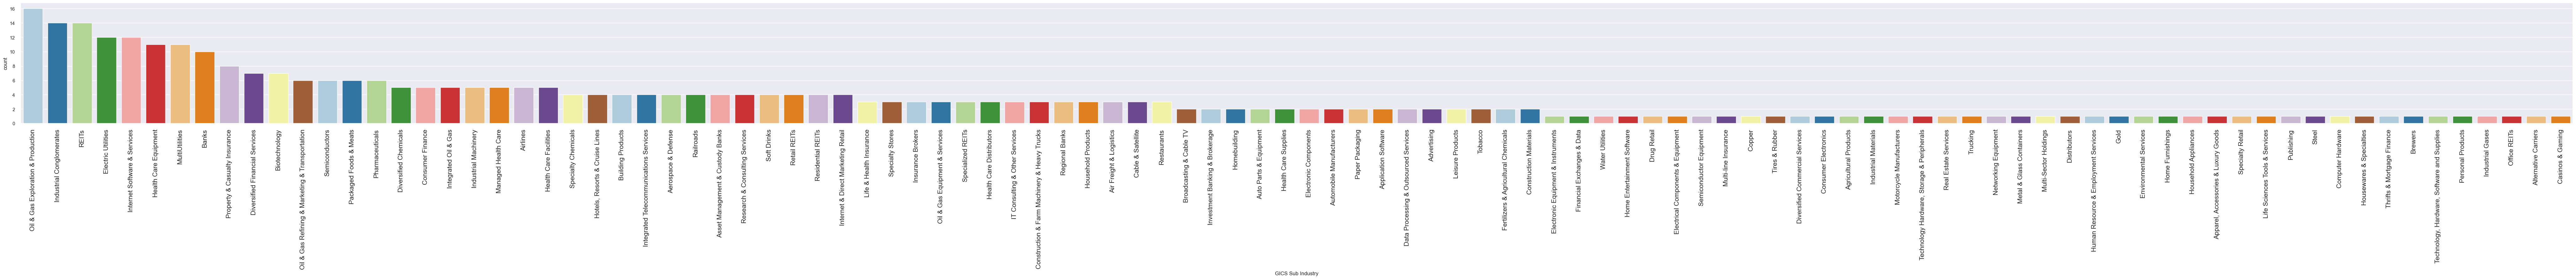

In [258]:
labeled_barplot_6(df, 'GICS Sub Industry', perc=True, n=None, sort_by_count=True)
# where n is the number of sub sectors to display on the countplot

---

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

debug string value error:

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [261]:
df["Security"]

0      American Airlines Group
1                       AbbVie
2          Abbott Laboratories
3            Adobe Systems Inc
4         Analog Devices, Inc.
                ...           
335                 Yahoo Inc.
336            Yum! Brands Inc
337     Zimmer Biomet Holdings
338              Zions Bancorp
339                     Zoetis
Name: Security, Length: 340, dtype: object

### end of labeled_barplots

### Bivariate Analysis

In [262]:
df_nameless = df.drop(["Security", "Ticker Symbol"], axis=1)

The following steps are adapted from chatgpt3 (Up to (including) create heat map of the reordered pivot table):

Create a pivot table, with indexes for 2 naming columns
Ticker Name and Security.

chatgpt3: use pairplot and scatterplot:

estimated time for sns.pairplot: ~26.1 - 32.8 s

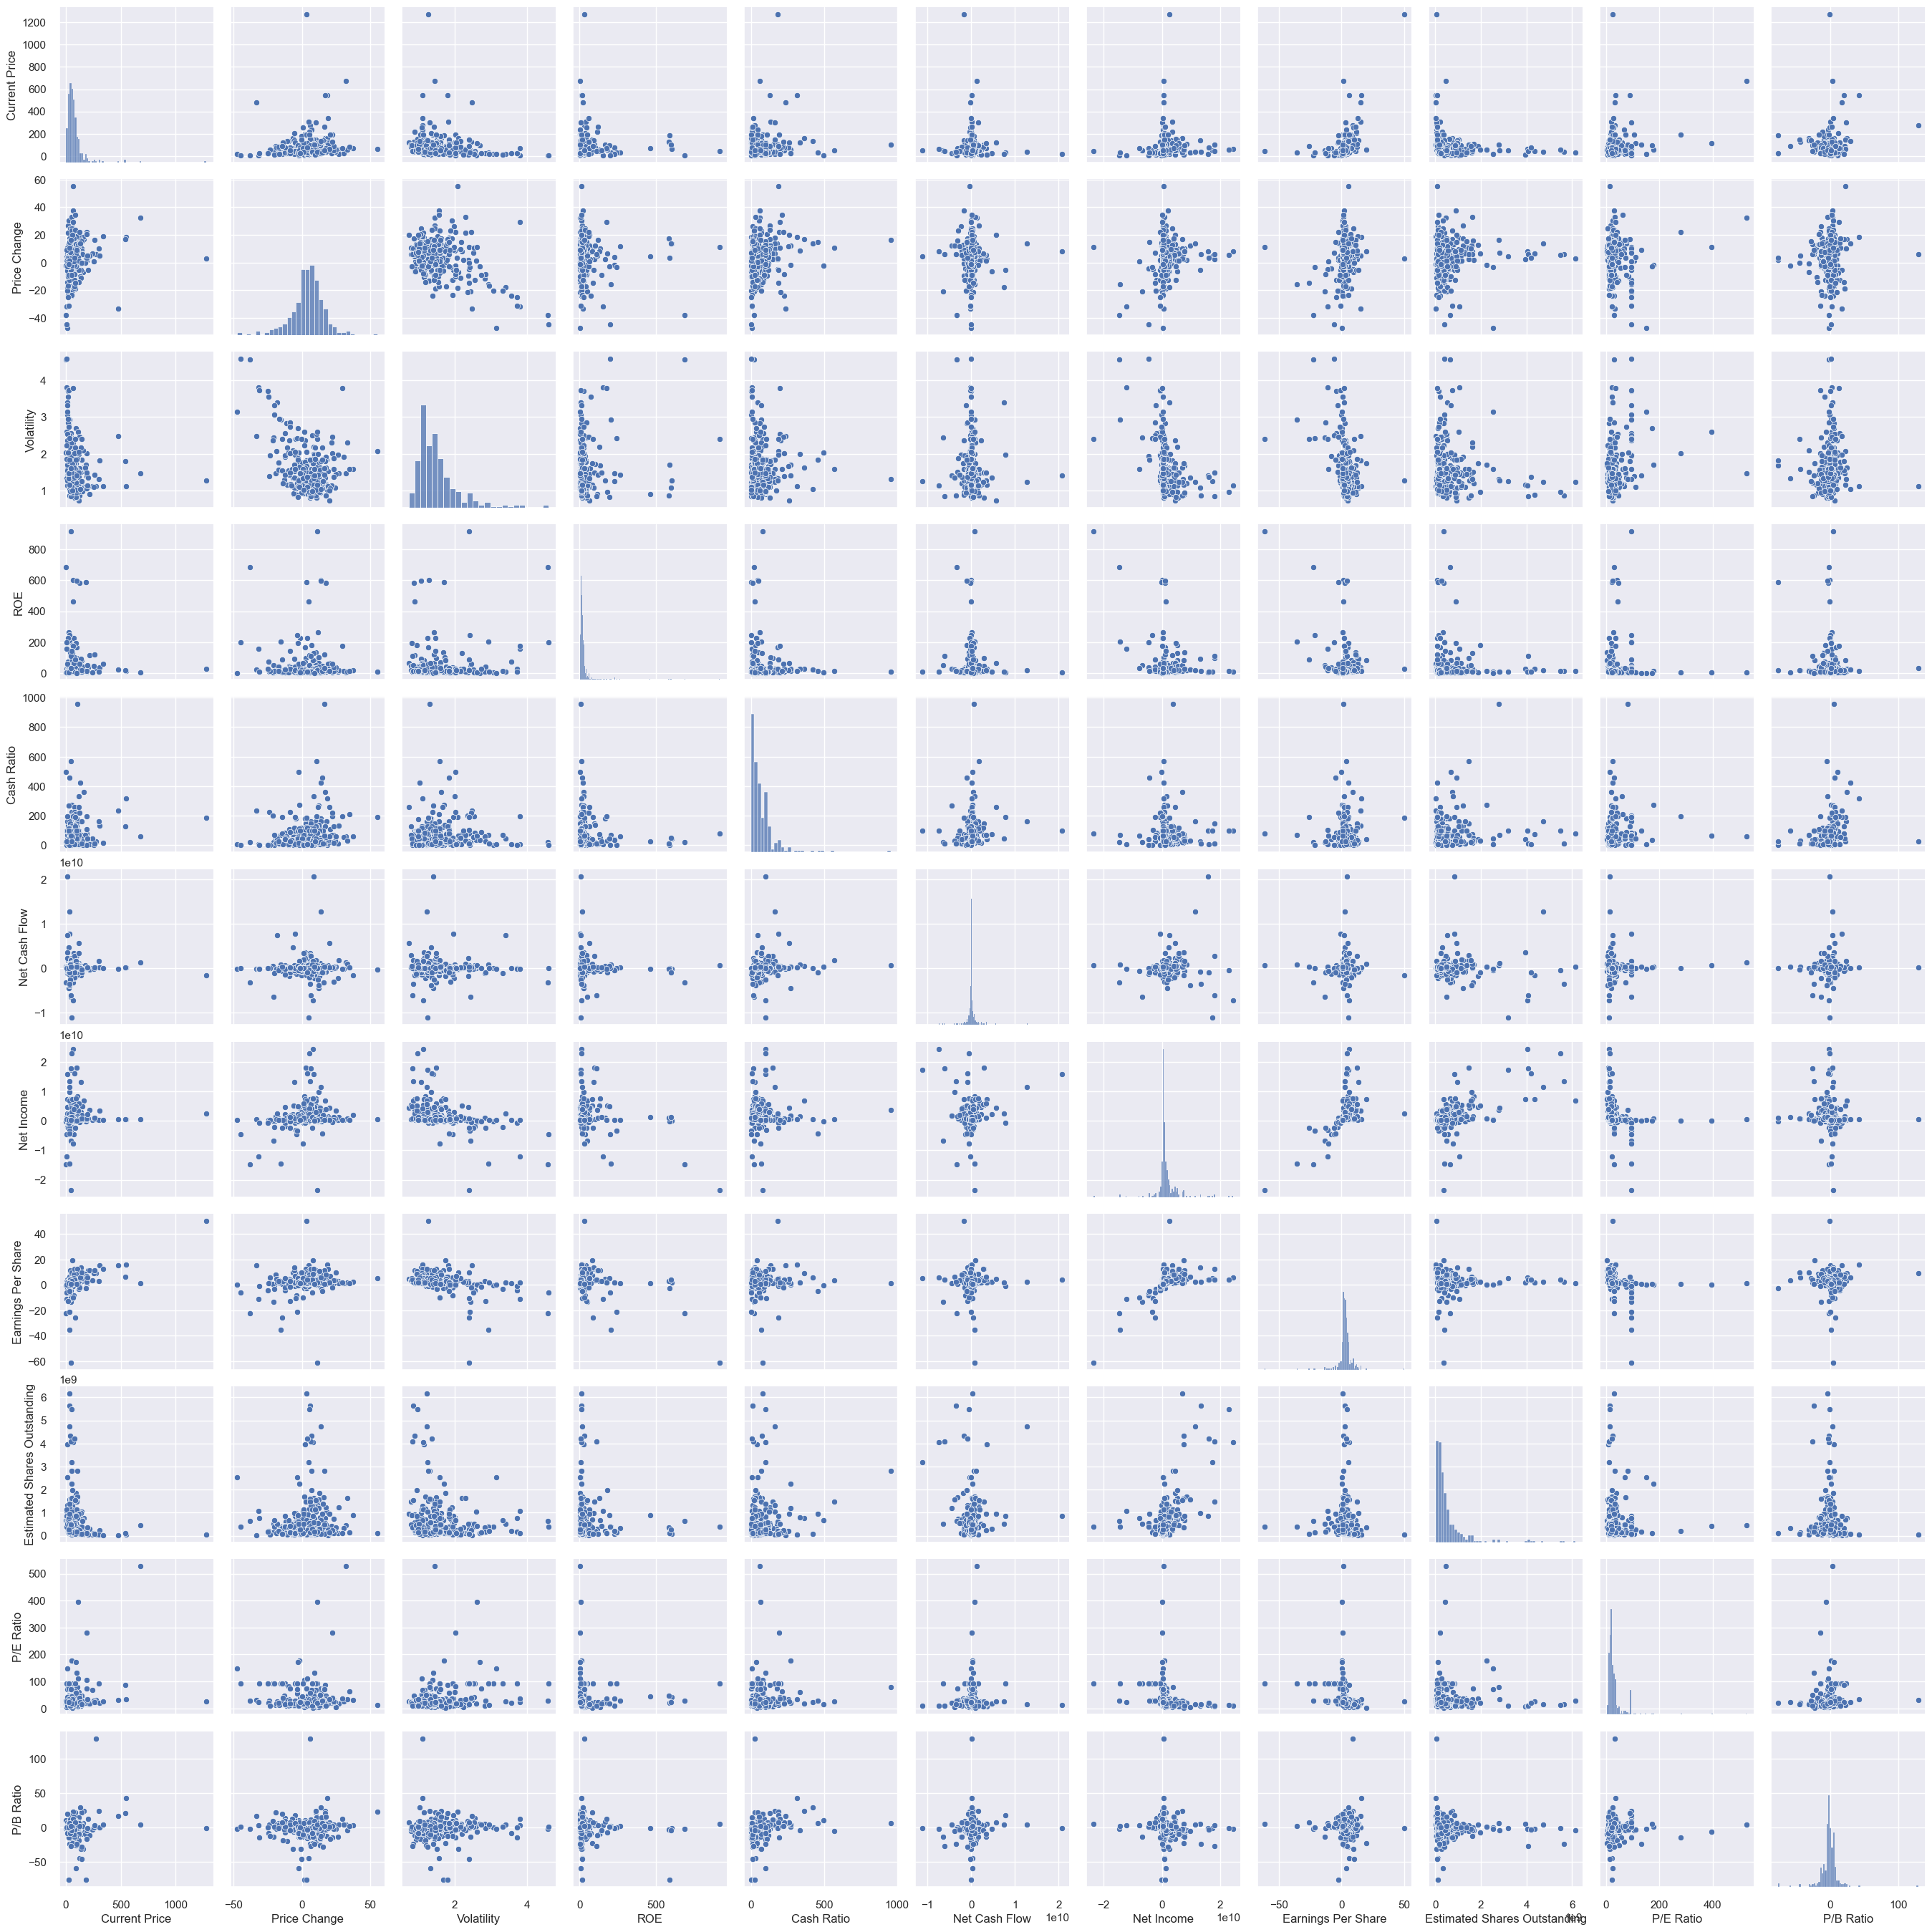

In [263]:
sns.pairplot(df)

- [stackoverflow | nested loop, counters 1 apart](https://stackoverflow.com/questions/56929931/how-to-run-a-nested-loop-in-python-inside-list-such-that-the-outer-loop-starts-f)

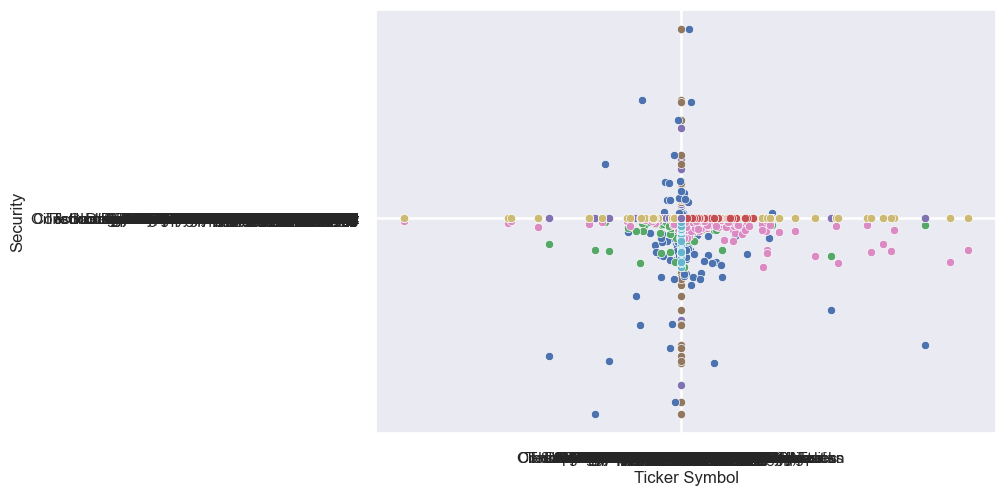

In [264]:
for i, col, in enumerate(df.columns):
    old_col=col
    # for j, new_col in enumerate(df.columns)+1:
    for k in range(i+1, len(df.columns)): # GitHub Copilot, Tabnine AI
        sns.scatterplot(data=df, x=df.columns[i], y=df.columns[k]) # chatgpt3, stackoverflow.nested_loop

- [Towards DataScience | Quadrant Analysis](https://towardsdatascience.com/how-to-perform-a-quadrant-analysis-in-python-9f84d36f8a24) "A Quadrant chart is ... a scatter plot ... divided into 4 sections / quadrants"

### Create a pivot table of the DataFrame, with Name1 and Name2 as index, Category1 and Category2 as columns, and Value as the values:

```
pivot = df.pivot_table(values='Value', index=['Name1', 'Name2'], columns=['Category1', 'Category2'], fill_value=0)
```


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

`sel_cols = [c for c in df.columns if df[c].dtype in ['object', 'datetime64[ns]']]`
[sparkbyexample | select columns by type](https://sparkbyexamples.com/pandas/pandas-get-list-of-dataframe-columns-based-on-data-type/#:~:text=Using%20DateFrame.,based%20on%20the%20data%20type.&text=In%20case%20if%20you%20wanted,based%20on%20the%20data%20type.&text=Alternatively%2C%20if%20you%20are%20using,column%20names%20by%20data%20type.)

In [266]:
# list comprehensions per chatgpt3
idx_cols=[c for c in df.columns if df[c].dtype in ['object']] # GitHub Copilot
valu_cols=[c for c in df.columns if df[c].dtype in ['float64', 'int64']] # GitHub Copilot, Tabnine AI

In [267]:
pivot = df.pivot_table(values=valu_cols, index=idx_cols, aggfunc='mean') # GitHub Copilot, Tabnine AI



### Compute the pairwise distances between the rows of the pivot table:

```
row_dist = pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index)
```


In [268]:
# NameError: name 'squareform' is not defined # ChatgGPT3
# from scipy.spatial.distance import pdist, squareform
row_dist=pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index) # GitHub Copilot, Tabnine AI, ChatGPT3


### Compute the linkage matrix using the distances:

```
row_clusters = linkage(row_dist, method='complete')
```


In [269]:
row_clusters = linkage(row_dist, method='complete')


Create the dendrogram of the clusters:

```
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
```


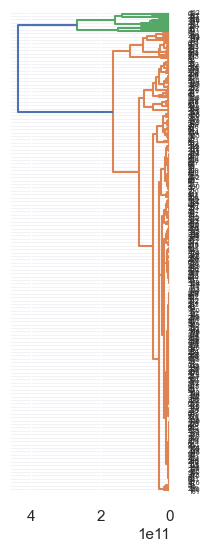

In [270]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')


### Reorder the pivot table according to the clustering:

```
df_rowclust = pivot.iloc[row_dendr['leaves']]
```


In [271]:
df_rowclust = pivot.iloc[row_dendr['leaves']]


### Create the heatmap of the reordered pivot table:

```
sns.heatmap(df_rowclust, cmap='RdBu_r')
```

<Axes: ylabel='Ticker Symbol-Security-GICS Sector-GICS Sub Industry'>

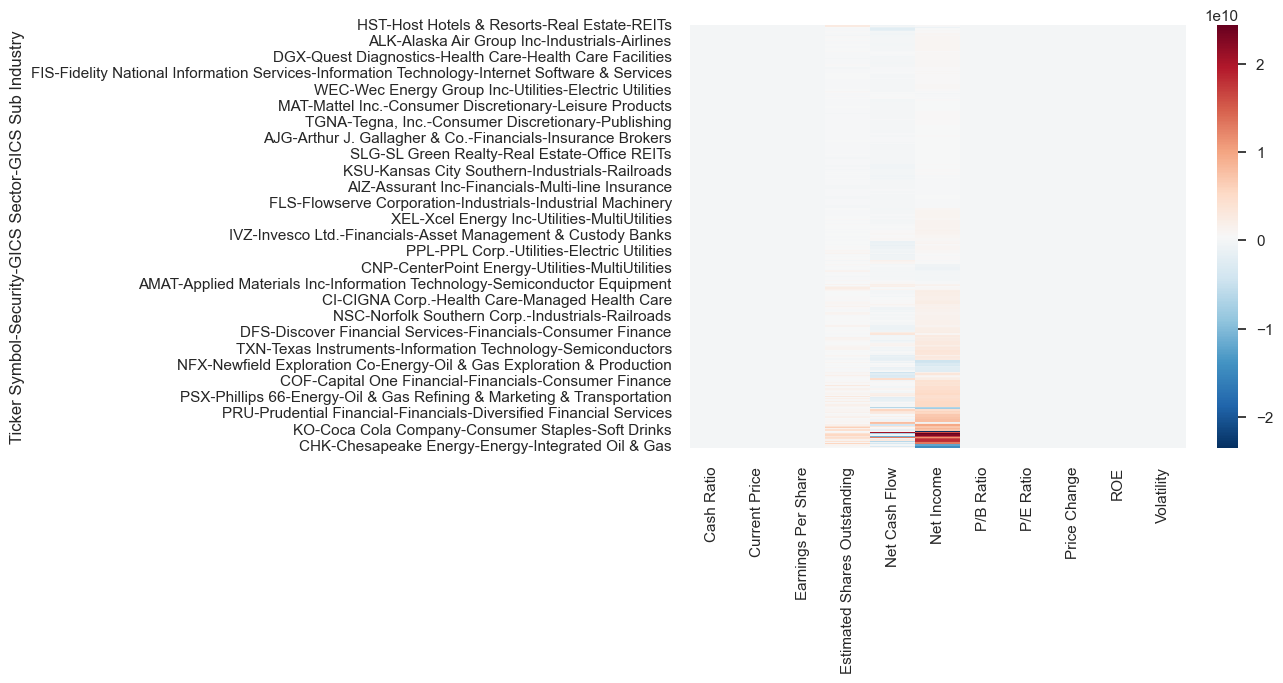

In [272]:
sns.heatmap(df_rowclust, cmap='RdBu_r')

In [273]:
# correlation check

# plt.figure(figsize=(15, 7))
# sns.heatmap(
#     df_nameless.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
# )
# plt.show()

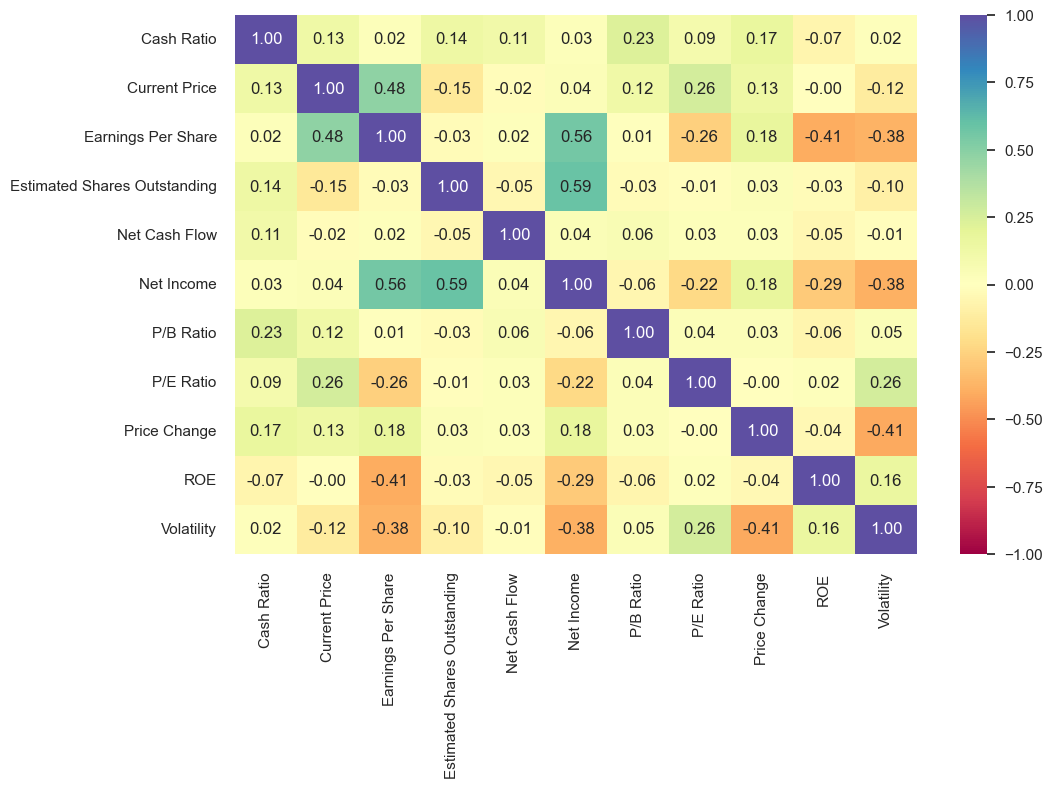

In [274]:
plt.figure(figsize=(11, 7))
sns.heatmap(
    df_rowclust.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Positive Correlations:
From the above analysis, in which a heatmap was created from a dataframe which was created from reordering Ticker Name, Security, GICS Sector, and GICS Sub Industry: (GitHub Copilot assisted.)

Estimated Shares Outstanding and P/E Ratio are not highly correlated. (although GitHub Copilot suggested they would be.)

("Highly" is used relatiely here, as the correlations are not extremely high for any variable pair.)

Net Income is highly correlated to Earnings Per Share, and Estimated Shares Outstanding. (56%, 59%, respectively)

Earnings per share is also highly correlated to Current Price. (48%)

----------

### Negative Correlations:
Puzzlingly, from this heatmap: if you get good Earnings per Share you would expect a poor Return on Equity (ROE) ( -41%).
- One way to explain this maybe that if the particular stock you are analyzing is a high growth stock, then you would expect a low ROE, as the company is reinvesting its profits into growth. (This is a common strategy for high growth companies, as they are trying to grow their business as fast as possible, and they are not interested in paying dividends to shareholders, as they are trying to reinvest their profits into growth.) (From GitHub Copilot.)
- Another explanation might be that the company is not profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A third explanation might be that the company is not profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fourth explanation might be that the company is profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fifth explanation might be that the company is profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- Case 6: The company is profitable, and is paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
- Case 7: The company is profitable, and is not paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
To put these previous 4 points into a 2 x 2 matrix with the 2 axes being: "Is the company profitable?" and "Is the company reinvesting its profits into growth?", we get the following matrix:<br>
| case | profitable | reinvesting profits into growth | paying dividend  | case | issue                                                                    |<br>
| ---- | ---------- | ------------------------------- | ---------------  | ---- | -----                                                                    |<br>
|  1   | yes        | yes                             | y/n              |  1   | N/A                                                                      |<br>
|  2   | no         | yes                             | no               |  2   | no profits to reinvest in growth                                         |<br>
|  3   | no         | yes                             | yes              |  3   | don't dividends get paid out of profits? (Also reinvesting (no) profits) |<br>
|  4   | yes        |                                 |                  |  4   |                                                                          |<br>
The above matrix can be used to explain the negative correlation between ROE and Earnings per Share. (From GitHub Copilot.)


note: Excel file heatmap_insights_anaysis.xlsx must be open for load() from xlwings library to run

In [275]:
# loads from excel using xlwings
# load()

In [276]:
pd.read_excel('../data/heatmap_insights_analysis.xlsx')

case profitable reinvesting profits into growth paying dividend   case.1   
0     1          y                               y              y/n       1  \
1     2          n                               y                n       2   
2     3          n                               y                y       3   
3     4          y                               y                y       4   
4     5          y                               y                n       5   
5     6          y                               n                y       6   
6     7          y                               n                n       7   
7     8        NaN                             NaN              NaN       8   

                                               issue  
0                                                NaN  
1                   no profits to reinvest in growth  
2  don't dividends get paid out of profits? (Also...  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  
7                                                NaN

## Further reasoning on negative correlation explanation:

Possibly that gains are already priced into stocks with good Earnings per Share, 

so that the stock price is already high,

and so that the stock price is not expected to rise further. (From GitHub Copilot.)

Therefore, Return on Equity is unlikely in this case of high Earnings per Share.

This is due to the mantra to buy low and sell high. (From GitHub Copilot.)

To reiterate, it makes sense intuitively to consider the hypothetical case that:

a company has good profits (Earnings)

and low stock price (GH Copilot)

so Earnings per Share is high (high EPS).

However, this is likely to change as soon as Earnings come in (earnings season).

### Earnings Season:

[When is earnings Season 2023 US?](https://www.ii.co.uk/investing-with-ii/international-investing/us-earnings-season)
[Investopedia | Earnings Season](https://www.investopedia.com/terms/e/earningsseason.asp#:~:text=Earnings%20season%20typically%20begin%20in,to%20non%2Dearnings%20season%20levels.)
```
Earnings season 
typically begin 
in the month following 
most major companies' fiscal quarters: 
```


**January, April, July, and October.**

```
It generally lasts about 6 weeks, 
at which point the number of earnings reports being released 
return to non-earnings season levels.
```

### Explaining Return on Equity negative correlation with Earnings per share (-41% correlation from heatmap) (continued):


To return to the subject of trying to explain the inverse correlation between ROE and EPS, GitHub Copilot suggested that this was a function of reinvestment of profits and paying a dividend. However, since both of these would appear to be dependent on being profitable, more certainly over an extended period of time, some of the answers given seem  to be contradictory.

One explanation that seems to make sense is that as soon as a company publishes earnings (profits), these are factored into the price, and therefore earnings per share is no longer a good indicator of future price, but instead is a lagging indicator (rather than a leading indicator).

### Lagging indicators:

According to geckoboard.com: 

```
Lagging indicators take a long time to change, and show the later-stage results of your efforts. Leading indicators, on the other hand, measure the activities you think will help you reach your goal, and can be tracked on a more ongoing basis.
```
- [Leading / Lagging Indicators | geckoboard.com](https://www.geckoboard.com/blog/leading-lagging-or-lost-how-to-find-the-right-key-performance-indicators-for-your-sales-team/#:~:text=Lagging%20indicators%20take%20a%20long,on%20a%20more%20ongoing%20basis.)

However, we will try for another explanation of leading and lagging indicator.

----------------

### Leading, Lagging and Coincident Indicators:

- [TRADING  > TRADING STRATEGIES > Leading, Lagging, and Coincident Indicators | investopedia.com](https://www.investopedia.com/ask/answers/what-are-leading-lagging-and-coincident-indicators/)

Economists and investors are constantly watching for: 
- signs of what's immediately ahead for the markets and 
    - for the larger economy. 

The most closely watched of these signs are:
- **economic or business statistics** that are 
    - **tracked from month to month** and
        - therefore **indicate a pattern**. 

All indicators fall into 1 of 3 categories:

1. <u>Leading indicators</u> are considered to point toward future events.
2. <u>Lagging indicators</u> are seen as confirming a pattern that is in progress.
3. Coincident indicators occur in real-time and clarify the state of the economy.


- [TRADING  > TRADING STRATEGIES > Leading, Lagging, and Coincident Indicators | investopedia.com](https://www.investopedia.com/ask/answers/what-are-leading-lagging-and-coincident-indicators/)

----------------------

### Proposed Consideration of Earnings per Share as a Lagging indicator:

From the above definition of Lagging indicators from investopedia.com, the EPS (Earnings per Share) would seem to indicate a pattern that is retrospective and hence a lagging indicator.

The company carries out business operations:
- These operations in the given wider business environment result in a bottom line indicating profit/loss
- These profits are then reported, usually during earnings season (1st month of each quarter).
- Until profits (earnings) are published the market prices the stock based upon expectation.
- Immediately upon publication the stock price adjusts from pricing based upon expected or forecast earnings to actual published earnings, in a step function change approximated by the heaviside function.
(- This does not account for those stakeholders and personnell in close dealings with the company, (including suppliers, wholesalers, consumers, investors, etc.) who may have greater knowledge of business operations.
    - This sets up a mechanism which may provide information to the market in the form of price, as entities will act in the market according to the information available to them.
        - For this reason, the share price could be thought of as a composite of a lagging indicator (due to earnings only being published quarterly) and a coincident indicator (not because at those moments early in the fiscal quarter when the earnings are published, the price adjustment is basically momentarily coincident with the economic condition (although it could be argued that since these (quarterly earnings reports (10-Q e.g. [APPL 10-Q for Q1 2023](https://www.sec.gov/ix?doc=/Archives/edgar/data/320193/000032019323000006/aapl-20221231.htm))) are compiled retrospectively on last quarter performance they are retrospective albeit slightly-closer
            - to-being-contemporaneous-than-normal, as lagging indicators, briefly at that moment when they are published.))
)




### Apple 10-K Report Excerpt on Competition:

(A summary of key performance indicators and information on the business are published in the 10-K Yearly Shareholder report, publicly available on SEC.gov for all publicly traded companies in the United States.) 

For example, here is an adapted excerpt (on Competition) from the [APPL](https://www.sec.gov/ix?doc=/Archives/edgar/data/320193/000032019322000108/aapl-20220924.htm) 2022 10-K Report, which distills the factors which characterize the market environment in which business operations take place:

```

The markets for the Company’s products and services are

- highly competitive, and

- are characterized by:
    
    1. aggressive price competition
        (- and resulting downward pressure on:
            - gross margins),
    2. frequent introduction of new products and services,
    3. short product life cycles,
    4. evolving industry standards,
    5. continual improvement in product price and performance characteristics,
    6. rapid adoption of technological advancements by competitors, and
    7. price sensitivity on the part of consumers and businesses.

```

### Proposed consideration of price as composed of two factors: concurrent and lagging indicators:

(Side note: An argument (not discussed here) could also be made that price has an element of speculation built in, whether this is a leading indicator is another debate.)

In summary of thoughts to date:
there are 2 mechanisms at work:
 - one which contributes to that practically unknown fraction of the price being broadly a concurrent indicator
    - influenced by live information about the company, and the interaction with the business environment and the wider market.
 - a second which contributes to that practically unkown fraction of the price being broadly a lagging indicator
    - influenced by quarterly reports
        - which are themselves retrospective
            - due to relying on:
                - last quarter's earnings, 
                - as well as: 
                    - due to the fact that information in these reports is quickly incorporated into price as soon as published,
                    - and immediately after the instant of publication:
                        - these reports are no longer relevant to trying to predict future share price.

### Primary Conclusion on Earnings Per Share inverse relationship to Return on Equity:

Therefore, primarily, Earnings Per Share (EPS) is not a leading indicator, and therefore cannot be used as a predictor for future Return on Equity (ROE).

### Secondary Conclusion on Earnings Per Share inverse relationship to Return on Equity:

Secondarily, due to the nature of the "buy low, sell high" mantra, and pursuit of this elusive, retrospective-derived, idealized, theory-based practice in daily swing trading, by the average retail trader...<br>
- and the fact that due to the involvement of human emotion in trading, 
    - exacerbated by the nature of [short and long term debt cycles, contributing to boom and bust](https://youtu.be/w2aNKCG4YFQ) (as early as the tulip bubble of the late 1700s in which the price of the then unknown virus encoded ideopathic pattern on tulip bulbs and speculation of the future crop they would produce caused an irrational spiralling market at city trading benches causing the price of certain highly prized tulip bulbs to exceed the price of a house, to the American Stock Exchange and breakthroughs in [electricity](https://youtu.be/Cidg4Xfpjmc?t=1405) and [wireless](https://youtu.be/X5jPoQzEh-M?t=76) [radio communication](https://youtu.be/X5jPoQzEh-M?t=76), to the roaring 20s, crash of 1929, The Great Depression, the development of physics applications from [vacuum tubes in televisions and mainframe computers](https://github.com/CoderSales/Portfolio_Project_1)([site](https://codersales.github.io/Portfolio_Project_1/), [source-site](https://youtu.be/WnNm_uJYWhA)), to the development of the [Field Effect Transistor](https://en.wikipedia.org/wiki/Field-effect_transistor) into the [Metal Oxide Silicon Field Effect Transistor](https://byjus.com/physics/mosfet/#:~:text=What%20Is%20a%20MOSFET%3F,is%20constructed%20by%20three%20terminals.), ([MOSFET clip 1](https://youtu.be/Bfvyj88Hs_o?t=2), and [2](https://youtu.be/bHwl8TdEI6k?t=213)), [integrated circuits](https://en.wikipedia.org/wiki/Integrated_circuit), the [microprocessor](https://en.wikipedia.org/wiki/Microprocessor), [personal computing](https://en.wikipedia.org/wiki/Personal_computer), the fear of missing out fueling The 1980's Bull Run, driven by the fear of being excluded from the meteoric rise of those stocks fueled by Big Money and Debt, enabling rapid progress, and depending on present regulatory conditions, at times veering towards a Winner Takes all dynamic with rewards disproportionate to differences before the reckoning of the selection of those few companies by the market forces driven by the consumer and the demand for excellence and value at low cost, Black Monday 1987, Commodities Futures Markets in the early 1990s, Internet Stocks in the mid to late 1990s, culminating in the dot-com bubble bursting around the turn of the millenium, as well as anti-trust, pro-competitive, anti-monopoly legislation enacted and enforced by the legislature, leading to the release of the monopoly and break up of Microsoft into Intel and Microsoft, allowing for Google and the noughties Web 2.0 Dominated by search) hype: 

        
- often take over from the logic of investing 60 / 40 stocks and bonds split or simply investing in the Standard & Poor's 500 or other indices.

### Continuing Stocks / Bonds 60/40 split:

#### Alternative views on stock / bond split ratios:

- recent conditions have led to newly proposed: [Bonds Over Stocks: The New 60-40 Portfolio](https://www.wsj.com/articles/bonds-over-stocks-the-new-60-40-portfolio-11673921445)

- [Why a 60/40 Portfolio Is No Longer Good Enough | investopedia.com](https://www.investopedia.com/articles/financial-advisors/011916/why-6040-portfolio-no-longer-good-enough.asp)

```
For many years, a large percentage of financial planners and stockbrokers crafted portfolios for their clients that were composed of 60% equities and 40% bonds or other fixed-income offerings. And these so-called balanced portfolios did rather well throughout the 80s and 90s.

But, a series of bear markets that started in 2000 coupled with historically low-interest rates have eroded the popularity of this basic approach to investing. 
```

#### Discussion on stock / bond split ratios:
- [The 'Investment Committee' weigh in on the traditional 60/40 portfolio](https://youtu.be/rE62oY8KdAc)

### Continuing discussion on negative correlation between Earnings per Share and Return on Equity (-41%):

To summarize thoughts on negative correlation between EPS and ROE:
- as Earnings are already priced into the Share Price:
- and given the aim to buy low and sell high
- with the risk (exacerbated by hype)
    - of only hearing about a recent trend when towards the end of a cycle
        - ironically, when early buyers are looking to liquify their position 
    - may lead to a situation in which the retail trader earnestly seeking to buy low, sell high, 
        - may in fact buy just after the peak, thinking that after a recent fall in price, the price is about to take off again, when in fact the price has hit a [support level](https://www.investopedia.com/trading/support-and-resistance-basics/) (1)
    - the ratio if the Earnings Per Share

----------------
Of note: 

not everyone 'buys into' [technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp#:~:text=Key%20Takeaways-,Technical%20analysis%20is%20a%20trading%20discipline%20employed%20to%20evaluate%20investments,the%20security's%20future%20price%20movements.) (2)

```
Technical analysis may be contrasted with fundamental analysis, which focuses on a company's financials rather than historical price patterns or stock trends.
```


----------------

Some opt for [fundamental analysis](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

- which `measures a security's intrinsic value by examining related economic and financial factors.`
- where the `end goal is to determine a number that an investor can compare with a security's current price to see whether the security is`
    -  `undervalued or`
    - `overvalued`
- `by other investors.` (3)


----------------
(1) [TECHNICAL ANALYSIS > TECHNICAL ANALYSIS BASIC EDUCATION > Support and Resistance Basics | Investopedia](https://www.investopedia.com/trading/support-and-resistance-basics/)

(2) [technical analysis | Investopedia](https://www.investopedia.com/terms/t/technicalanalysis.asp#:~:text=Key%20Takeaways-,Technical%20analysis%20is%20a%20trading%20discipline%20employed%20to%20evaluate%20investments,the%20security's%20future%20price%20movements.)

(3) [fundamental analysis | Investopedia](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

### Further reference on Technical Analysis:

- [Charting the Market: S&P 500 Key Levels to Watch](https://youtu.be/T0V334TtgNQ?list=PLWTr_eZZ784IxI_D8x9Ctg4YbAaexGoyS&t=21)

Continuining on both the themes of:
- EPS negatively correlated to ROE and
- fundamental analysis
    - to:<br>
        `determine a number that an investor can compare with a security's current price to see whether the security is`<br>
            -  `undervalued or`<br>
            - `overvalued` (1)

(1) [fundamental analysis | Investopedia](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

...

If instead of buying low and selling high
retail traders are more likely to buy high and sell low
(particularly in the tract of market history analysed here), 
then it may indicate that
either a good analysis or understanding of the fundamentals is not occurring
or
that despite best efforts emotion is taking over causing mass buying of overheated hyped stock bubbles under the mistaken forecast, say, that upward trends will continue as they are about to burst.

This would in effect lead to the inverted:

buy high sell low.

If this is in fact what is occurring over this period, 

this would be reflected in high earning per share companies 

with good quarterly and yearly reports and businesses

in all or certain areas of the market which may be overheated

being overbought,

so that they have already been overbought, 

leading to fewer shares outstanding, 

creating upward price pressure, due to Keynsian scarcety of supply of the stock,

crashing through resistance bands being supported by the rising tide of buyers watching the price rise and trying to get in on the bull run,

only to be [stopped out](https://www.investopedia.com/terms/s/stoppedout.asp#:~:text=Stopped%20out%20is%20a%20phrase,an%20abrupt%20pullback%20in%20price.)

of trades when the bubble bursts and buyers loose interest, 

leading to

high earnings per share stocks being overbought initally (at high prices) during the up trend,

only to be then oversold in the subsequent correction (possible overcorrection),

([depending on what the coefficient of damping for the economic system being modelled is](https://en.wikipedia.org/wiki/Damping))

and whether there is over and undershoot or not of the theoretical real price of the stock.

- This leads to a negative correlation between Earnings per Share and Return on Equity, with a correlation of -40% for the feature pair in the dataset.

### Side note on Examples of Alternative pressures on stock price:


#### relative performance to competitor performance

- [Ford Motor Co. stock falls Wednesday, underperforms market | MarketWatch](https://www.marketwatch.com/data-news/ford-motor-co-stock-falls-wednesday-underperforms-market-8ea7c5a3-1bbea27370bc)


```
The stock underperformed when compared to some of its competitors Wednesday, as Tesla Inc. TSLA, -7.77% fell 2.02% to $180.59.

Trading volume (68.9 M) eclipsed its 50-day average volume of 68.5 M.

```
(1)



(1) [Ford Motor Co. stock falls Wednesday, underperforms market | MarketWatch](https://www.marketwatch.com/data-news/ford-motor-co-stock-falls-wednesday-underperforms-market-8ea7c5a3-1bbea27370bc)

#### Further note on Ford Motor Company
[April 20, 2023 10:45 AM]
- Monday marks the last chance for investors to receive the next dividend payout from Ford Motor 

- The company announced on Thursday that it would pay shareholders a quarterly dividend of 15 cents per share. On Tuesday, Ford Motor will go ex-dividend, meaning the stock will trade lower to reflect that payout. In other words, the stock will likely open 15 cents lower than it would have opened on any other day.


- [Ford Motor: Dividend Insights](https://www.benzinga.com/news/dividends/23/04/31916677/ford-motor-dividend-insights)

### Price-to-Book Ratio (PB) or (P/B):


- [Price-to-Book (PB) Ratio: Meadning, Formula, and Example](https://www.investopedia.com/terms/p/price-to-bookratio.asp)

- `measures the market's valuation of a company relative to its book value.`

- `to compare a firm's market capitalization to its book value and locate undervalued companies` 

- `ratio is calculated by dividing the company's current stock price per share by its book value per share (BVPS)`

- P/B Ratio= Book Value per Share (BVPS) / Market Price per Share

    - where, 
        - Market Price per Share = Current market price of the share
        - Book Value per Share = (Total assets - intangible assets - total liabilities) ÷ number of outstanding shares



 (1)

(1) [Price-to-Book (PB) Ratio: Meadning, Formula, and Example](https://www.investopedia.com/terms/p/price-to-bookratio.asp)

### intangible assets:


- The following is an adapted excerpt from [What Are Intangible Assets? Examples and How to Value](https://www.investopedia.com/terms/i/intangibleasset.asp):

- Goodwill, brand recognition and intellectual property, such as patents, trademarks, and copyrights, are all intangible assets. 
- Intangible assets exist **in opposition to tangible assets**, 
    - which include:
        - land, 
        - vehicles,
        - equipment, and
        - inventory.

- Additionally, financial assets such as:
    - stocks and
    - bonds,
        - which derive their value from:
            - contractual claims, 
    -are considered tangible assets.

(1)

(1) [What Are Intangible Assets? Examples and How to Value](https://www.investopedia.com/terms/i/intangibleasset.asp)

## end of Further note on negative correlation

### Next steps in Bivariate Analysis:

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

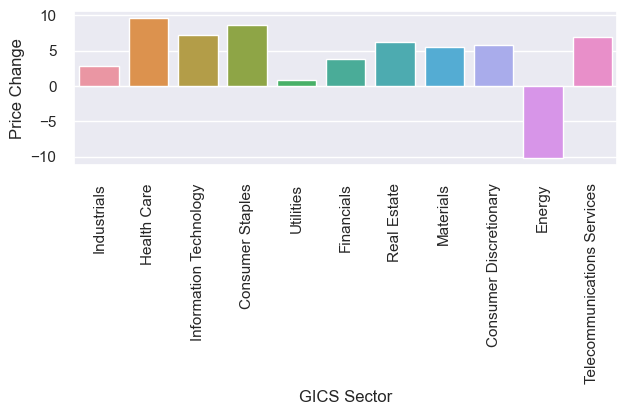

In [277]:
plt.figure(figsize=(7, 2))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### Upon inspection of the above barplot:

- Over the period of this analysis, the Energy Sector experienced a negative Price Change.
- All other industrial sectors had positive price changes over the period.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

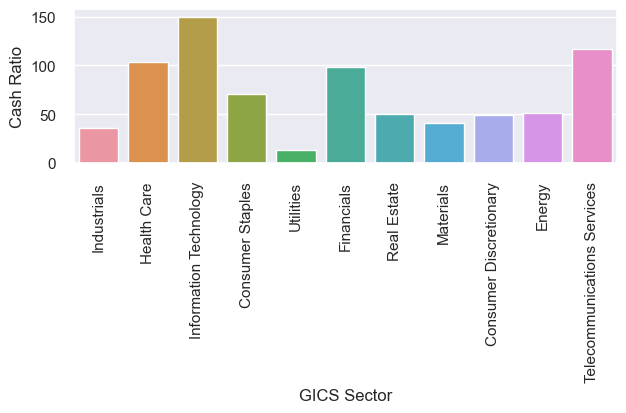

In [278]:
plt.figure(figsize=(7,2))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot of GICS Sector versus Cash Ratio (for the 11 GICS Sectors shown on the X-axis):

- The highest Cash Ratio was in Information Technology (at approximately 150).
- The next highest Cash Ratio was in Telecommunications Service (at just below 120).
- The third highest Cash Ratio was in Health Care (at just above 100).
- The fourth highest Cash Ratio was in Financials (at just below 100).
- The fifth highest Cash Ratio (significantly lower) was Consumer Staples (at approximately 70).
- In contrast, (a few ranks below those mentioned above, thus breaking the sequence) Consumer Discretionary Cash Ratio was around 50, on par with Energy and Real Estate for Ranks 6, 7 and 8.
- Ranks 9, 10 and 11 are: Matrials, Industrials and Utilities to round out the Cash Ratio Rankings per GICS Sector.


------------------------------

### Financial Terminology

##### Cash Ratio

- a measurement of a company's liquidity. 
- It specifically calculates the ratio of a company's:
    - total cash and cash equivalents to its
    - current liabilities.
- The metric evaluates company's ability to repay its short-term debt 
    - with cash or near-cash resources, 
        - such as easily marketable securities. 

[Cash Ratio | Investopedia](https://www.investopedia.com/terms/c/cash-ratio.asp#:~:text=The%20cash%20ratio%20is%20a%20liquidity%20measure%20that%20shows%20a,by%20its%20total%20current%20liabilities.)

---------------------------

##### Marketable Securities
- liquid financial instruments that can be quickly converted into cash at a reasonable price.
[CORPORATE FINANCE > ACCOUNTING > Marketable Securities | Investopedia](https://www.investopedia.com/terms/m/marketablesecurities.asp)

-----------------------

##### Financial instruments 
assets that can be traded, or they can also be seen as packages of capital that may be traded.
- Most types of financial instruments provide efficient flow and transfer of capital all throughout the world’s investors.
- These assets can be in the form of:
    - cash,
        - a contractual right to deliver or receive cash or 
            - another type of financial instrument, or 
    - evidence of one’s ownership in some entity.
[INVESTING > INVESTING BASICS > Financial Instruments | Investopedia](https://www.investopedia.com/terms/f/financialinstrument.asp)

-----------------------------

##### Capital

##### Capital: Definition, How It's Used, Structure, and Types in Business

Capital is a broad term that can describe anything that:
- confers value or benefit to its owners, 
    - such as a factory and its 
        - machinery,
        - intellectual property like:
            - patents, or the
            - financial assets:
                - of a business or an
                - individual.

While money itself may be construed as capital,
- capital is more often associated with:
    - cash 
        - that is being put to work for:
            - **productive** or
            - **investment purposes**.
 In general,
- capital is a critical component of **running a business**
    - from **day to day** and
    - financing its **future growth**.

[ECONOMY > ECONOMICS > Capital](https://www.investopedia.com/terms/c/capital.asp)

----------------------------------------

#### Investor

##### What Does an Investor Do? What Are the Different Types? [Updated February 17, 2023]

An investor is any person or other entity (such as a firm or mutual fund)
- who commits capital with the expectation of receiving financial returns. 

Investors rely on different financial instruments 
- to earn a rate of return and accomplish important financial objectives like:
    - building retirement savings, 
    - funding a college education, or merely
    - accumulating additional wealth over time.
[TRADING SKILLS > TRADING BASIC EDUCATION > Investor](https://www.investopedia.com/terms/i/investor.asp)

------------------------------

#### Financial Assets

##### Financial Asset Definition and Liquid vs. Illiquid Types
A financial asset is a:
- liquid asset
    - that gets its value from a:
        - contractual right or
        - ownership claim.
    - Cash,
    - stocks,
    - bonds,
    - mutual funds, and
    - bank deposits 
        are all are examples of financial assets. 
    
    Unlike:
    - land,
    - property,
    - commodities, or other
    - tangible physical assets,
    
    financial assets do not necessarily have inherent:
    - physical worth or even a
    - physical form.
    
    Rather, their value reflects **factors of supply and demand**
    - in the marketplace in which they trade,
    - as well as the degree of **risk** they carry.

[CORPORATE FINANCE > ACCOUNTING > Financial Assets](https://www.investopedia.com/terms/f/financialasset.asp)

----------------------

#### Asset

###### What Is an Asset? Definition, Types, and Examples [Updated March 29, 2023]

An asset is a
- resource with economic value that an:
    - individual,
    - corporation, or
    - country 
- owns or controls with the
- expectation that it will provide a future benefit.
[CORPORATE FINANCE > FINANCIAL STATEMENTS > Asset](https://www.investopedia.com/terms/a/asset.asp)

### End of Financial Terminology Section

------------------------------
------------------------------

### P/E Ratio versus GICS Sector barplot

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

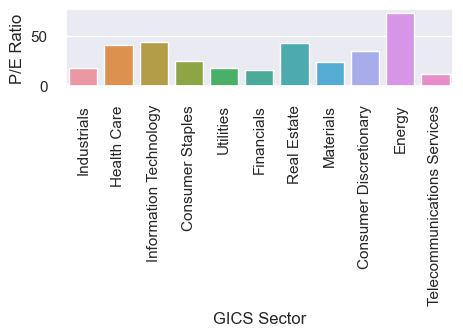

In [279]:
plt.figure(figsize=(5,1))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot:

- Energy had the highest P/E Ratio at over 70.
- The next highest 3 sectors were close in P/E Ratio (just above 40, and barely over half that of Energy ):
    - They were Information Technology (2nd), followed by
    - Real Estate (3rd), and
    - Health Care (4th)
- The 5th highest was Consumer Discretionary at around 35.
- The 6th highest was Consumer Staples at around 25.
- The 7th highest was Materials also around 25.
- The next 2 sectors came in at just under 20 for P/E Ratio:
    - They were Industrials, and
    - Utilities
- The 10th highest was Financials at just over 15
- The 11th highest was Telecommunications Services at just over 10.

### End of P/E Ratio versus GICS Section barplot

------------------------------

## Business definitions and theory

[P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

###### P/E Ratio - Price-to-Earnings Ratio Formula, Meaning, and Examples:

- The price-to-earnings ratio is the ratio for valuing a company that measures its current share price relative to its earnings per share (EPS). 

- The price-to-earnings ratio is also sometimes known as the:
    - **price multiple** or the 
    - **earnings multiple**.

- P/E ratios are used by:
    - investors and
    - analysts
- to determine the relative value of a company's shares
- in an **apples-to-apples comparison**. 

- It can also be used to compare:
    - a company against its 
    - **own historical record** or to
- compare:
    - **aggregate markets** against: 
        - one another or
        - over time.

P/E may be estimated on a:
- trailing (backward-looking) or
- forward (projected) basis.

potentially:
- high P/E: stock overvalued, or investors expecting high future growth rates.

**Companies that have no earnings or that are losing money do not have a P/E ratio because there is nothing to put in the denominator.** 

Two kinds of P/E ratios—forward and trailing P/E—are used in practice.

A P/E ratio holds:
- the most value to an analyst 
- when compared against:
    - similar companies in the 
    - same industry 
    
        or
    - for a single company across a
    - period of time.


P/E Ratio= Earnings per share / Market value per share
​

To determine the P/E value, one must simply divide the current stock price by the earnings per share (EPS), that is:


P/E ratio = current stock price / earnings per share (EPS)


The current stock price (P) can be found simply by plugging a stock’s ticker symbol into any finance website, and although this concrete value reflects what investors must currently pay for a stock, the EPS is a slightly more nebulous figure.

EPS comes in two main varieties. TTM is a Wall Street acronym for "trailing 12 months". This number signals the company's performance over the past 12 months. The second type of EPS is found in a company's earnings release, which often provides EPS guidance. This is the company's best-educated guess of what it expects to earn in the future. These different versions of EPS form the basis of trailing and forward P/E, respectively.

The P/E ratio helps one determine whether a stock is overvalued or undervalued. A company's P/E can also be benchmarked against other stocks in the same industry or against the broader market, such as the S&P 500 Index.

Sometimes, analysts are interested in long-term valuation trends and consider the P/E 10 or P/E 30 measures, which average the past 10 or past 30 years of earnings, respectively. These measures are often used when trying to gauge the overall value of a stock index, such as the S&P 500, because these longer-term measures can compensate for changes in the business cycle.

The P/E ratio of the S&P 500 has fluctuated from a low of around 5x (in 1917) to over 120x (in 2009 right before the financial crisis). The long-term average P/E for the S&P 500 is around 16x, meaning that the stocks that make up the index collectively command a premium 16 times greater than their weighted average earnings.

###### P/E for appraising projected EPS:
Analysts and investors review a company's P/E ratio when they determine if the share price accurately represents the projected earnings per share.

Some investors prefer to look at the trailing P/E because they don't trust another individual’s earnings estimates. But the trailing P/E also has its share of shortcomings—namely, that a company’s past performance doesn’t signal future behavior.

Investors should thus commit money based on future earnings power, not the past. 

[P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

---

##### Earnings Power

Earnings power is a figure that telegraphs a business's 
- ability to generate profits over the long haul,
    - assuming all current operational conditions generally remain constant. 
Equity analysts ritually assess a company’s earning power when issuing buy and sell recommendations 
- to best determine if a company’s stock is worth investing in.

###### Understanding Earnings Power:
Earnings power factors in several elements, including a company’s:
- total assets, 
plus
- recent growth or loss trends.

Earning power likewise considers metrics such as a company's:
- return on assets (ROA),
    - which is the ability to generate profit from its assets, as well as the 
- return on equity (ROE),
    - which is a measurement of a stock’s financial performance.

Furthermore, some companies determine earnings power based on:
- dividend yields 
    - associated with specific securities.


###### Earnings Power Metrics for Determining Current Business Health

A company can cultivate a keen insight into its earnings power by examining earnings before interest and tax (EBIT). 

- This calculation examines a company’s earnings power based on:
    - continuous operations, as well as
    - cash flow.

By generally excluding any and all irregular income or expenses,
- EBIT provides a reliable snapshot 
    - of a company’s **liquidity profile**,its ability to
    - meet debt obligations, and its 
    - overall health.




(1)

(1) [CORPORATE FINANCE > CORPORATE FINANCE BASICS > Earnings Power | Investopedia](https://www.investopedia.com/terms/e/earnings-power.asp)

-----------------------

#### Earnings Before Interest and Taxes (EBIT)

The following excerpt is adapted from [CORPORATE FINANCE > FINANCIAL STATEMENTS > Earnings Before Interest and Taxes (EBIT) | Investopedia](https://www.investopedia.com/terms/e/ebit.asp)

##### Earnings Before Interest and Taxes (EBIT): How to Calculate with Example:

###### What Is Earnings Before Interest and Taxes (EBIT)?:

Earnings before interest and taxes (EBIT) is an indicator of a company's profitability.

EBIT can be calculated as revenue minus expenses excluding tax and interest. 

EBIT is also referred to as:
- operating earnings,
- operating profit, and
- profit before interest and taxes.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Earnings Before Interest and Taxes (EBIT) | Investopedia](https://www.investopedia.com/terms/e/ebit.asp)

--------------------------

#### Revenue

###### What is Revenue? Definition, Formula, Calculation, and Example:

Revenue is the money generated from normal business operations, calculated as the average sales price times the number of units sold. 

Revenue = (average sales price) * (number of units sold)

top line (or gross income) figure from which costs are subtracted to determine net income.

Revenue is also known as sales on the income statement.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Revenue | Investopedia](https://www.investopedia.com/terms/r/revenue.asp)

------------------------------

#### Income Statement

#### Income Statement: How to Read and Use It [Updated March 27, 2023]

##### What you need to know about this essential financial statement

###### What Is an Income Statement?

1. An income statement is 1 of the 3 important financial statements used for reporting a company’s financial performance over a specific accounting period. 

The other two key statements are:

2. the balance sheet and 

3. the cash flow statement.

[CORPORATE FINANCE > FINANCIAL STATEMENTS > Income Statement](https://www.investopedia.com/terms/i/incomestatement.asp)

------------------------------

## Financial Statements

The following excerpt is adapted from: [CORPORATE FINANCE > FINANCIAL STATEMENTS > Financial Statements | Investopedia](https://www.investopedia.com/terms/f/financial-statements.asp)

### Financial Statements: List of Types and How to Read Them [Updated March 21, 2023]

#### What Are Financial Statements?

Financial statements convey business activities and financial performance of a company.

Financial statements are often audited to ensure accuracy.

Primary financial statements include:
- the balance sheet,
- income statement, 
- statement of cash flow, and
- statement of changes in equity. 

- balance sheet: provides an overview of assets, liabilities, and shareholders' equity as a snapshot in time.
- income statement: primarily focuses on a company’s revenues and expenses during a particular period. Once expenses are subtracted from revenues, the statement produces a company's profit figure called net income.
- cash flow statement (CFS): measures how well a company generates cash to pay its debt obligations, fund its operating expenses, and fund investments.
- statement of changes in equity: records how profits are retained within a company for future growth / distributed to external parties.

**Investors and financial analysts** rely on financial data to analyze the performance of a company and
- **make predictions about the future direction of the company's stock price**. 

One of the most important resources of reliable and audited financial data is the **annual report**, which contains the firm's financial statements.

The 3 major financial statement reports are:
1. the **balance sheet**,
2. **income statement**, and
3. statement of **cash flows**.

##### Balance Sheet:
The balance sheet 
- provides an overview of a company's:
    - assets, 
    - liabilities, and
    - shareholders' equity 

The date at the top of the balance sheet tells you:
- when the snapshot was taken,
    - which is generally: the end of the reporting period. 
    
Below is a breakdown of the items in a balance sheet.

###### Assets
- Cash and cash equivalents are: liquid assets, including Treasury bills and certificates of deposit.
- Accounts receivables are money owed to the company by its customers for the sale of its product and service.
- Inventory is the goods on hand, intended for sale as a course of business. May include finished goods, work in progress, or raw materials on hand to be worked.
- Prepaid expenses are costs prepaid in advance of when they are due. Recorded as an asset because their value has not yet been recognized; should the benefit not be recognized, the company would theoretically be due a refund.
- Property, plant, and equipment are capital assets owned by a company for its long-term benefit. Includes buildings used for manufacturing or heavy machinery used for processing raw materials.
- Investments are assets held for speculative future growth. These aren't used in operations; they are simply held for capital appreciation.

Trademarks, patents, goodwill, and other intangible assets can't physically be touched but have future economic (and often long-term benefits) for the company.

###### Liabilities
- **Accounts payable** are the bills due as part of the normal course of operations of a business. This includes: utility bills, rent invoices, and obligations to buy raw materials.
- **Wages payable** are payments due to staff for time worked.
- **Notes payable** are recorded debt instruments that record official debt agreements including the **payment schedule and amount**.
- **Dividends payable** are dividends that have been declared to be **awarded to shareholders** but have not yet been paid.
- **Long-term debt** can include a variety of obligations including sinking bond funds, mortgages, or other loans that are due in their entirety in longer than one year. Note that the **short-term portion of this debt** is recorded as a **current liability**.

###### Shareholders' Equity

Shareholders' equity is a company's total assets minus its total liabilities. Shareholders' equity (also known as stockholders' equity) represents the amount of money that would be returned to shareholders if all of the assets were liquidated and all of the company's debt was paid off.
Retained earnings are part of shareholders' equity and are the amount of net earnings that were not paid to shareholders as dividends. 

##### Example of a Balance Sheet 
Below is a portion of ExxonMobil Corporation's (XOM) balance sheet for fiscal year 2021, reported as of Dec. 31, 2021.

Total assets: $338.9 billion.

Total liabilities: $163.2 billion.

Total equity: $175.7 billion.

Total liabilities + equity = $338.9 billion = total assets for the period.

[Investor Relations | Earnings Call | Exxonmobil](https://investor.exxonmobil.com/)


see next cell for xlwings library method load() from excel sheet with same Balance sheet referenced in (1) but taken from (2) for ease of formatting
(2)

(1)

(1) [CORPORATE FINANCE > FINANCIAL STATEMENTS > Financial Statements | Investopedia](https://www.investopedia.com/terms/f/financial-statements.asp)

(2) [2021, UNITED STATES, SECURITIES AND EXCHANGE COMMISSION, WASHINGTON, D.C. 20549 | FORM 10-K ☑ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 | For the fiscal year ended December 31, 2021 | Exxon Mobil Corporation](https://www.sec.gov/ix?doc=/Archives/edgar/data/0000034088/000003408822000011/xom-20211231.htm) (see page 72 for Balance Sheet on December 31, 2021)

---

##### Exxon 2021 Balance Sheet Example

- Try reading DataFrame in using pandas.
- Debug pandas pd.read_excel() method.
- Issue: 15 Columns
- Resave to Local as was saved to OneDrive
- Rerun pd.read_excel()

Note: from earlier: these values are in millions of USD.

- Excel: Cut top row in Sheet1, Save
- Rerun:
    - `Exxon2021=pd.read_excel('../data/Balance-Sheet-Exxon-Mobil-2021.xlsx')`
    - `Exxon2021`
- Issue Fixed [Resolved]

In [280]:
# rerun pd.read_excel() and save to variable
Exxon2021=pd.read_excel('../data/Balance-Sheet-Exxon-Mobil-2021.xlsx')

In [281]:
Exxon2021

Elements  Reference   
0                                              Assets        NaN  \
1                                      Current assets        NaN   
2                           Cash and cash equivalents        NaN   
3                 Notes and accounts receivable - net        6.0   
4                                         Inventories        NaN   
5                 Crude oil, products and merchandise        3.0   
6                              Materials and supplies        NaN   
7                                Other current assets        NaN   
8                                Total current assets        NaN   
9     Investments, advances and long-term receivables        8.0   
10  Property, plant and equipment, at cost, less a...        9.0   
11          Other assets, including intangibles - net        NaN   
12                                       Total assets        NaN   
13                                                NaN        NaN   
14                                        Liabilities        NaN   
15                                Current liabilities        NaN   
16                            Notes and loans payable        6.0   
17           Accounts payable and accrued liabilities        6.0   
18                               Income taxes payable        NaN   
19                          Total current liabilities        NaN   
20                                     Long-term debt       14.0   
21                   Postretirement benefits reserves       17.0   
22                    Deferred income tax liabilities       19.0   
23          Long-term obligations to equity companies        NaN   
24                        Other long-term obligations        NaN   
25                                  Total liabilities        NaN   
26                                                NaN        NaN   
27                      Commitments and contingencies       16.0   
28                                                NaN        NaN   
29                                             Equity        NaN   
30                     Common stock without par value        NaN   
31  (9,000 million shares authorized, 8,019 millio...        NaN   
32                                Earnings reinvested        NaN   
33             Accumulated other comprehensive income        NaN   
34                      Common stock held in treasury        NaN   
35  (3,780 million shares in 2021 and 3,786 millio...        NaN   
36                         ExxonMobil share of equity        NaN   
37                           Noncontrolling interests        NaN   
38                                       Total equity        NaN   
39                       Total liabilities and equity        NaN   
40                                                NaN        NaN   
41  The information in the Notes to Consolidated F...        NaN   
42                                                 72        NaN   

   December 31, 2021 December 31, 2020  
0                NaN               NaN  
1                NaN               NaN  
2             6,802             4,364   
3            32,383            20,581   
4                NaN               NaN  
5            14,519            14,169   
6             4,261             4,681   
7             1,189             1,098   
8            59,154            44,893   
9            45,195            43,515   
10          216,552           227,553   
11           18,022            16,789   
12          338,923           332,750   
13               NaN               NaN  
14               NaN               NaN  
15               NaN               NaN  
16            4,276            20,458   
17           50,766            35,221   
18            1,601               684   
19           56,643            56,363   
20           43,428            47,182   
21           18,430            22,415   
22           20,165            18,165   
23            2,857             3,253   
24           21,717        

##### End of Exxon 2021 Balance Sheet Example

## end of Financial Statements Section

---------------------------------------
---------------------------------------

### Volatility:

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

---------------------------------------

### Theory: (Definitions):

--------------------------

#### Volatility:

#### Volatility: Meaning In Finance and How it Works with Stocks [Updated March 31, 2023]

```

Volatility is a measure of distribution of returns for a security or index. Higher volatility = riskier security
- Volatility is measured from:
    - the standard deviation or variance in returns from the security or index.

In the securities markets, volatility is often associated with big swings in either direction. 
e.g.
- when the stock market rises and falls more than one percent over a sustained period of time, it is called a volatile market. 
- An asset's volatility is a key factor when pricing options contracts.

```

[OPTIONS AND DERIVATIVES > STRATEGY & EDUCATION > Volatility | Investopedia](https://www.investopedia.com/terms/v/volatility.asp#:~:text=Volatility%20is%20a%20statistical%20measure,same%20security%20or%20market%20index.)

------------------------------------------

#### Financial Securities

##### What Is a Security?

```
A "security" is a financial instrument with monetary value. 
- A security can represent:
    - owning a corporation (stock),
    - a creditor relationship with a government body / corporation (bond);
    - or rights to ownership (option).

```


[INVESTING > INVESTING BASICS > Financial Securities | Investopedia](https://www.investopedia.com/terms/s/security.asp)

---------------------------

#### Call Option

##### What Is a Call Option? [Updated March 31, 2023]

```

Call options:
- financial contracts that give the option buyer the right but not the obligation to buy a:

- stock,
- bond,
- commodity or
- other asset / instrument

at a price, within a time period. 

The stock, bond, or commodity is the underlying asset. 

A call buyer profits when the underlying asset increases in price.

```

[TRADING > OPTIONS AND DERIVATIVES > Call Option | Investopedia](https://www.investopedia.com/terms/c/calloption.asp)

-----------------------------------

#### Underlying Asset

#### Underlying Asset (Derivatives)—Definition, How It Works
```
Underlying asset are the financial assets upon which a derivative’s price is based. 

Options are an example of a derivative. 

A derivative is a financial instrument with a price that is based on a different asset. 
```

[TRADING SKILLS > TRADING BASIC EDUCATION > Underlying Asset](https://www.investopedia.com/terms/u/underlying-asset.asp)

----------------------

#### Derivative

#### Derivatives: Definition, Types, Considerations, and Pros and Cons, key points on these securitized contracts

```
Derivative : 
- a type of financial contract whose value is dependent on an underlying asset, group of assets, or benchmark. 
- set between 2 or more parties that can trade on an exchange or over-the-counter (OTC).
```
[TRADING > OPTIONS AND DERIVATIVES > Derivative | Investopedia](https://www.investopedia.com/terms/d/derivative.asp)

---------

#### Over the counter

#### Over-the-Counter (OTC): Definition; Trading and Security Types Defined

```

Over-the-counter (OTC)
- the process of trading securities via a broker-dealer network as opposed to on a centralized exchange like the New York Stock Exchange.

Over-the-counter trading can involve:
- stocks,
- bonds, and
- derivatives,
    - which are financial contracts that derive their value from an underlying asset such as a commodity.

```
[STOCK TRADING > STOCK TRADING STRATEGY & EDUCATION > Over-the-Counter | Investopedia](https://www.investopedia.com/terms/o/otc.asp)

---------

#### Commodity

#### What Is a Commodity and Understanding Its Role in the Stock Market
```
A commodity is a basic good used in commerce that is interchangeable with other goods of the same type. Commodities are most often used as inputs in the production of other goods or services. A commodity thus usually refers to a raw material used to manufacture finished goods. A product, on the other hand, is the finished good sold to consumers.

```
[ECONOMY > ECONOMICS > Commodity | Investopedia](https://www.investopedia.com/terms/c/commodity.asp)

--------------------

#### Product

#### Commodity vs. Product: An Overview; What's the Difference?

```
Commodity and Product 
- (Often confused, used interchangeably)
- different when used by traders today. 
Commodity - a raw material used to manufacture finished goods
Product - the finished good sold to consumers

Commodities and products are part of the production and manufacturing process.
The main difference is where they are in the chain. 
Commodities are typically in the early stages of production.
Products fall at the final stage.
```
[INVESTING > COMMODITIES > Product | Investopedia](https://www.investopedia.com/ask/answers/021615/whats-difference-between-commodity-and-product.asp)

---

#### Raw Materials

#### Raw Materials: Definition, Accounting, and Direct vs. Indirect
```
Raw materials 
- materials / substances used in the primary production or manufacturing of goods. 
- commodities bought and sold on commodities exchanges worldwide. 
- Businesses buy and sell raw materials in the factor market because raw materials are factors of production.
```
[ECONOMY > ECONOMICS > Raw Materials | Investopedia](https://www.investopedia.com/terms/r/rawmaterials.asp)

---

#### Factor Market

```
"Factor market" 
- a term economists use for all resources businesses use to purchase, rent, or hire what they need to produce goods / services. 
- Those needs are the factors of production, which include raw materials, land, labor, and capital.

The factor market is also called the input market.
- By this definition, all markets are either factor markets, where businesses obtain the resources they need,
    - or goods and services markets, where consumers make their purchases.
```
[ECONOMY > ECONOMICS > Factor Market | Investopedia](https://www.investopedia.com/terms/f/factor-market.asp)

---

#### Factors of Production

#### 4 Factors of Production, Defined, Explained With Examples [Updated March 21, 2023]
```
Factors of production:
- inputs needed for creating a good or service
- include:
    - land,
    - labor,
    - entrepreneurship, and
    - capital.

Those who control the factors of production often enjoy the greatest wealth in a society. In capitalism, the factors of production are most often controlled by business owners and investors. In socialist systems, the government (or community) often exerts greater control over the factors of production.
```
[CORPORATE FINANCE > ACCOUNTING > Factors of Production | Investopedia](https://www.investopedia.com/terms/f/factors-production.asp)

---

#### Entrepreneur

#### Entrepreneur: What It Means to Be One and How to Get Started [Updated March 16, 2023]

##### Learn about the challenges facing entrepreneurs as they start new businesses

###### What Is an Entrepreneur?

```

An entrepreneur is an individual who creates a new business, bearing most of the risks and enjoying most of the rewards. The process of setting up a business is known as entrepreneurship. The entrepreneur is commonly seen as an innovator, a source of new ideas, goods, services, and business/or procedures.

Entrepreneurs play a key role in any economy, using the skills and initiative necessary to anticipate needs and bring good new ideas to market. Entrepreneurship that proves to be successful in taking on the risks of creating a startup is rewarded with profits, fame, and continued growth opportunities. Entrepreneurship that fails results in losses and less prevalence in the markets for those involved.

```
[BUSINESS > BUSINESS ESSENTIALS >  | Investopedia]()

---

#### Startup

#### What a Startup Is and What's Involved in Getting One Off the Ground
```
The term startup refers to a company in the first stages of operations. Startups are founded by one or more entrepreneurs who want to develop a product or service for which they believe there is demand. These companies generally start with high costs and limited revenue, which is why they look for capital from a variety of sources such as venture capitalists.
```
[COMPANY PROFILES > STARTUPS | Investopedia](https://www.investopedia.com/terms/s/startup.asp)

---

#### Venture Captialists:

```
A venture capitalist (VC) is a private equity investor that provides capital to companies with high growth potential in exchange for an equity stake. A VC investment could involve funding startup ventures or supporting small companies that wish to expand but have no access to the equities markets.
```
[ALTERNATIVE INVESTMENTS  PRIVATE EQUITY & VC > Venture Capitalists | Investopedia](https://www.investopedia.com/terms/v/venturecapitalist.asp)

---

#### Equity Markets

#### Equity Market: What It Is, How It Works, Types, and Examples
```
An equity market is a market in which shares of companies are issued and traded, either through exchanges or over-the-counter markets. Also known as the stock market, it is one of the most vital areas of a market economy. It gives companies access to capital to grow their business, and investors a piece of ownership in a company with the potential to realize gains in their investment based on the company's future performance. 
```
[MARKETS > STOCK MARKETS > Equity Market | Investopedia](https://www.investopedia.com/terms/e/equitymarket.asp)

#### Stock Market

#### What Is the Stock Market, What Does It Do, and How Does It Work?

##### What Is the Stock Market?

```

The term stock market refers to several exchanges in which shares of publicly held companies are bought and sold. 

Such financial activities are conducted through formal exchanges and via over-the-counter (OTC) marketplaces that operate under a defined set of regulations.



Both “stock market” and “stock exchange” are often used interchangeably. 

Traders in the stock market buy or sell shares on one or more of the stock exchanges that are part of the overall stock market.



The leading U.S. stock exchanges include the New York Stock Exchange (NYSE) and the Nasdaq.


```

##### KEY TAKEAWAYS

```

Stock markets are venues where buyers and sellers meet to exchange equity shares of public corporations.

Stock markets are components of a free-market economy because they enable democratized access to investor trading and exchange of capital.

Stock markets create efficient price discovery and efficient dealing.

The U.S. stock market is regulated by the Securities and Exchange Commission (SEC) and local regulatory bodies.


```

#### Understanding the Stock Market

```

The stock market allows buyers and sellers of securities to meet, interact, and transact. 

The markets allow for price discovery for shares of corporations and serve as a barometer for the overall economy. 

Buyers and sellers are assured of a fair price, high degree of liquidity, and transparency as market participants compete in the open market.

```
[INVESTOPEDIA > INVESTING > Stock Market | Investopedia](https://www.investopedia.com/terms/s/stockmarket.asp)

---

#### The Economy

#### How the Stock Market Affects the U.S. Economy [Updated February 28, 2023]

```

“The stock market is not the economy” is a phrase that gets used quite often. 

Many pundits argue that the fluctuations of the major indexes tasked with tracking the performance of the country’s biggest companies have little impact on the average American, as the majority of shares trade hands among the super-wealthy. 

```

[2](https://www.cnbc.com/2021/10/18/the-wealthiest-10percent-of-americans-own-a-record-89percent-of-all-us-stocks.html), [3](https://twitter.com/RBReich/status/1339259493905956866?ref_src=twsrc%5Etfw)

```

Moreover, the stock market can undergo bubbles emanating from hype, perception, and opinions of the agents that affect the stock prices. 

However, these perceptions do not necessarily reflect the real trading of goods and services, which in aggregate constitutes the economy.



While it’s true that the richest Americans own most of the stocks, it’s wrong to assume that nobody else is affected by how they are valued. Record numbers of American households are investing their savings in equities to secure their financial futures.


```

[4](https://www.investopedia.com/how-stock-market-affects-economy-5296138)

(1)

(1) [MARKETS > STOCK MARKETS > The Economy | Investopedia](https://www.investopedia.com/how-stock-market-affects-economy-5296138)

---

#### Changes in U.S. Family Finances from 2016 to 2019: Evidence from the Survey of Consumer Finances

```
The Federal Reserve Board’s triennial Survey of Consumer Finances (SCF) collects information about family income, net worth, balance sheet components, credit use, and other financial outcomes. (2)

The 2019 SCF reveals improvements in economic well-being among large parts of the income and wealth distributions since the previous time the survey was conducted in 2016, and many groups with historically lower income and wealth saw relatively large gains. (3)
```

(1)

(1) [Changes in U.S. Family Finances from 2016 to 2019: Evidence from the Survey of Consumer Finances | Federal Reserve BULLETIN | September 2020; Vol. 106, No. 5 | Board of Governors of the Federal Reerve System | www.federalreserve.gov](https://www.federalreserve.gov/publications/files/scf20.pdf)

(2) [ For a general description of the SCF data, see box 1, “The Data Used in This Article.” The appendix provides a summary of key technical aspects of the survey.]

(3) [For a detailed discussion of the 2016 survey as well as references to earlier surveys, see Jesse Bricker, Lisa J. Dettling, Alice Henriques, Joanne W. Hsu, Lindsay Jacobs, Kevin B. Moore, Sarah Pack, John Sabelhaus, Jeffrey Thompson, and Richard Windle (2017), “Changes in U.S. Family Finances from 2013 to 2016: Evidence from the Survey of Consumer Finances,” Federal Reserve Bulletin, vol. 103 (September), https://www.federalreserve.gov/publications/files/
scf17.pdf.](https://www.federalreserve.gov/publications/files/scf17.pdf.)

---

#### Changes in U.S. Family Finances from 2013 to 2016: Evidence from the Survey of Consumer Finances

```
The Federal Reserve Board’s triennial Survey of Consumer Finances (SCF) collects information about family incomes, net worth, balance sheet components, credit use, and other financial outcomes. [2]
```

```
The 2016 SCF reveals broad-based gains in income and net worth since the previous time the survey was conducted, in 2013. [3]
```

[1]

[1] [Changes in U.S. Family Finances from 2013 to 2016: Evidence from the Survey of Consumer Finances | Federal Reserve BULLETIN | September 2017; Vol 103, No. 3 | Board of Governors of the Feral Reserve System | www.federalreserve.gov](https://www.federalreserve.gov/publications/files/scf17.pdf)

[2] See box 1, “The Data Used in This Article,” for a general description of the SCF data. The appendix to this article provides a summary of key technical aspects of the survey.

[3] [For a detailed discussion of the 2013 survey as well as references to earlier surveys, see Jesse Bricker, Lisa J. Dettling, Alice Henriques, Joanne W. Hsu, Kevin B. Moore, John Sabelhaus, Jeffrey Thompson, and Richard Windle (2014), “Changes in U.S. Family Finances from 2010 to 2013: Evidence from the Survey of Consumer Finances,” Federal Reserve Bulletin, vol. 100 (September), https://www.federalreserve.gov/pubs/bulletin/2014/pdf/scf14.pdf.](https://www.federalreserve.gov/pubs/bulletin/2014/pdf/scf14.pdf.)

---

#### Securities and Exchange Commission (SEC)

```
What Is the Securities and Exchange Commission (SEC)?
The U.S. Securities and Exchange Commission (SEC) is an independent federal government regulatory agency responsible for protecting investors, maintaining fair and orderly functioning of the securities markets, and facilitating capital formation. It was created by Congress in 1934 as the first federal regulator of the securities markets. The SEC promotes full public disclosure, protects investors against fraudulent and manipulative practices in the market, and monitors corporate takeover actions in the United States. It also approves registration statements for bookrunners among underwriting firms.
```
[2](https://www.investor.gov/introduction-investing/investing-basics/role-sec), [3](https://www.sec.gov/about/what-we-do)




[1]

[1] [LAWS & REGULATIONS > SEC > Securities and Exchange Commission (SEC) | Investopedia](https://www.investopedia.com/terms/s/sec.asp)

[2] [The Role of the SEC | investor.gov](https://www.investor.gov/introduction-investing/investing-basics/role-sec)

[3] [What We Do | sec.gov](https://www.sec.gov/about/what-we-do)

---

#### The securities markets

##### United States Stock Exchanges

```

Stock exchanges are marketplaces in which U.S.:
- financial securities,
- commodities,
- derivatives, and other
- financial instruments 
are traded. 

While in the past, traders and brokers used to meet physically in a stock exchange building to trade stocks, now most of the financial trading happens electronically and automatically. 

Still, each exchange has its own unique listing requirements for companies that wish to join. 

As a baseline, stock exchanges require regular:
- financial reports,
- audited earnings, and
- minimal capital requirements.

```

[MARKETS > US MARKETS > Stock Exchanges | Investopedia](https://www.investopedia.com/ask/answers/08/security-market-usa.asp)

---

#### Stock exchanges / exchanges:

#### Exchanges: Definition, Explanation, Types and Examples
```
An exchange is a marketplace where securities, commodities, derivatives and other financial instruments are traded. The core function of an exchange is to ensure fair and orderly trading and the efficient dissemination of price information for any securities trading on that exchange. Exchanges give companies, governments, and other groups a platform from which to sell securities to the investing public.
```
[INVESTING > MARKETS > Exchanges | Investopedia](https://www.investopedia.com/terms/e/exchange.asp)

----

#### Mutual Funds: Definition,  Different Types and How They Are Priced [Updated March 13, 2023]
```
A mutual fund is a financial vehicle that pools assets from shareholders to invest in securities like:
- stocks,
- bonds,
- money market instruments, and
- other assets.
Mutual funds are operated by professional money managers,
- who allocate:
    - the fund's assets
- and attempt to produce:
    - capital gains or
    - income 
for the fund's investors. 

A mutual fund's portfolio is structured and maintained to match the investment objectives stated in its prospectus.
```
[INVESTING > GUIDE TO MUTUAL FUNDS | Investopedia](https://www.investopedia.com/terms/m/mutualfund.asp)

---

#### Rate of Return (Investopedia & sec.gov)

#### Rate of Return (RoR) Meaning, Formula, and Examples
```
What Is a Rate of Return (RoR)?
A rate of return (RoR) is:
- the net gain or
- loss

of an investment 

over a specified time period,

expressed as a percentage of the investment’s initial cost.

```
[2](https://www.sec.gov/investor/tools/mfcc/rate-of-return-help.htm?msclkid=17348605a9f511eca36cf66523cfe20c)


```
When calculating the rate of return, 

- you are determining:

    - the percentage change:
    
        - from the beginning of the period until the end.
```

[1]

[1] [CORPORATE FINANCE > FINANCIAL RATIOS > Rate of Return | Investopedia](https://www.investopedia.com/terms/r/rateofreturn.asp)

[2] [Rate of Return | sec.gov](https://www.sec.gov/investor/tools/mfcc/rate-of-return-help.htm?msclkid=17348605a9f511eca36cf66523cfe20c)

---

#### Rate of Return (sec.gov)

```
The annual rate of return is the percentage change in the value of an investment.

For example: If you assume you earn a 10% annual rate of return, then you are assuming that the value of your investment will increase by 10% every year. So, if you invest $1,000 for 1 year, then your investment would be worth $1,100 at the end of the one year period, before subtracting expenses.
```

[1]

[1] [Rate of Return | sec.gov](https://www.sec.gov/investor/tools/mfcc/rate-of-return-help.htm?msclkid=17348605a9f511eca36cf66523cfe20c)

[alternative link to 1](http://www.sec.gov/investor/tools/mfcc/rate-of-return-help.htm)

---

#### Prospectus

#### What Is a Prospectus? Example, Uses, and How to Read It

```
A prospectus is a formal document:
- required by and
- filed with
    - the Securities and Exchange Commission (SEC)

that provides details about an investment offering to the public. 

A prospectus is filed for offerings of:
- stocks,
- bonds, and
- mutual funds.

The prospectus can help investors make more informed investment decisions because it contains a host of relevant information about the investment or security. 

In areas other than investing,:
- a prospectus is a printed document that advertises or describes an offering such as a:
    - school,
    - commercial enterprise,
    - forthcoming book, etc. 

All forms of prospectus exist to:
- attract or inform:
    - clients,
    - members,
    - buyers, or
    - investors.
```

[INVESTING > INVESTING BASICS > Prospectus | Investopedia](https://www.investopedia.com/terms/p/prospectus.asp)

---

---

#### Money Manager

#### Money Manager: Definition, Duties, Examples, Compensation
```
A money manager is a person or financial firm:
- that manages the securities portfolio of:
    - an individual or
    - institutional investor. 

Typically, a money manager employs people with various expertise ranging from:
- research and selection of:
    - investment options to 
- monitoring the assets and deciding when to sell them.


In return for a fee,:
- the money manager has the fiduciary duty:
    - to choose and manage investments prudently for clients, including:
        - developing an appropriate investment strategy and 
            - buying and selling securities 
        - to meet those goals. 

A money manager may also be known as a:
- "portfolio manager,"
- "asset manager," or
- "investment manager."
```

[FUND TRADING > HEDGE FUNDS > Money Manager | Investopedia](https://www.investopedia.com/terms/m/moneymanager.asp)

---

#### Fiduciary

#### Fiduciary Definition: Examples and Why They Are Important
```
A fiduciary is a person or organization that acts on behalf of another person or persons, putting their clients’ interests ahead of their own, with a duty to preserve good faith and trust. 

Being a fiduciary thus requires being bound both legally and ethically to act in the other’s best interests.
```
[INVESTOPEDIA > FINANCIAL ADVISOR > Fiduciary| Investopedia](https://www.investopedia.com/terms/f/fiduciary.asp)

---

#### Good Faith

#### What Is the Doctrine of Utmost Good Faith in Insurance?
##### What Is the Doctrine Of Utmost Good Faith?
```

The doctrine of utmost good faith, also known by its Latin name uberrimae fidei, is a minimum standard, legally obliging all parties entering a contract to act honestly and not mislead or withhold critical information from one another. 

It applies to many everyday financial transactions and is one of the most fundamental doctrines in insurance law.

```
[ECONOMY > ECONOMICS > Good Faith | Investopedia](https://www.investopedia.com/terms/d/doctrineofutmostgoodfaith.asp)

---

#### Insurance: Definition, How It Works, and Main Types of Policies [Updated April 20, 2023]
```
Insurance is a:
- contract,
    - represented by a policy,
        - in which a policyholder receives:
            - financial protection or
            - reimbursement against losses
        - from an insurance company. 

The company pools clients’ risks to make payments more affordable for the insured. 

Most people have some insurance: for:
- their car,
- their house,
- their healthcare, or
- their life.

Insurance policies hedge against financial losses resulting from accidents, injury, or property damage. Insurance also helps cover costs associated with liability (legal responsibility) for damage or injury caused to a third party.
```

[2](https://files.consumerfinance.gov/f/documents/cfpb_building_block_activities_what-is-insurance_handout.pdf)



[1]

[1] [PERSONAL FINANCE > INSURANCE | Investopedia](https://www.investopedia.com/terms/i/insurance.asp)

[2] [Building Blocks Student Handout | What is insurance? | consumerfinance.gov](https://files.consumerfinance.gov/f/documents/cfpb_building_block_activities_what-is-insurance_handout.pdf)

---

#### Hedge

#### Hedge Definition: What It Is and How It Works in Investing

```
To hedge, in finance, is to:
- take an offsetting position in an:
    - asset or investment 
- that reduces the price risk:
    - of an existing position. 

A hedge is therefore a:
- trade:
    - that is made with the purpose of reducing the risk of:
        - adverse price movements in another asset. 

Normally,:
- a hedge consists of :
    - taking the opposite position:
        - in a related security or 
        - in a derivative security
    - based on the asset to be hedged.
```
[TRADING STRATEGIES  ADVANCED STRATEGIES & INSTRUMENTS | Investopedia](https://www.investopedia.com/terms/h/hedge.asp)

---

#### Portfolio

#### Financial Portfolio: What It Is, and How to Create and Manage One
```
A portfolio is a collection of financial investments like:
- stocks,
- bonds,
- commodities,
- cash, and
- cash equivalents,

including:
- closed-end funds and
- exchange traded funds (ETFs). 

People generally believe that:
- stocks,
- bonds, and
- cash

comprise the core of a portfolio. 

Though this is often the case,:
- it does not need to be the rule. 

A portfolio may contain a wide range of assets including:
- real estate,
- art, and
- private investments.
```
[INVESTING > PORTFOLIO MANAGEMENT > Portfolio| Investopedia](https://www.investopedia.com/terms/p/portfolio.asp)

---

#### Closed-End Fund

```
A closed-end fund is a type of mutual fund that issues a fixed number of shares through a single initial public offering (IPO) to raise capital for its initial investments. 

Its shares can then be bought and sold on a stock exchange but no new shares will be created and no new money will flow into the fund.


In contrast, an open-ended fund, such as most mutual funds and exchange-traded funds (ETFs), accepts a constant flow of new investment capital. It issues new shares and buys back its own shares on demand.


Many municipal bond funds and some global investment funds are closed-end funds.
```
[INVESTING > GUIDE TO MUTUAL FUNDS > Closed-End Fund | Investopedia](https://www.investopedia.com/terms/c/closed-endinvestment.asp)

---

#### Exchange-Traded Fund (ETF)

#### Exchange-Traded Fund (ETF), Definition, Explanation With Pros and Cons [Updated April 18, 2023]
```
An exchange-traded fund (ETF) is a type of pooled investment security that operates much like a mutual fund. Typically, ETFs will track a particular index, sector, commodity, or other assets, but unlike mutual funds, ETFs can be purchased or sold on a stock exchange the same way that a regular stock can. An ETF can be structured to track anything from the price of an individual commodity to a large and diverse collection of securities. ETFs can even be structured to track specific investment strategies.


The first ETF was the SPDR S&P 500 ETF (SPY), which tracks the S&P 500 Index, and which remains an actively traded ETF today.
```

KEY TAKEAWAYS

```

- An exchange-traded fund (ETF) is a basket of securities that trades on an exchange just like a stock does.
- ETF share prices fluctuate all day as the ETF is bought and sold; this is different from mutual funds, which only trade once a day after the market closes.

```
[2](https://www.morningstar.com/articles/1056474/the-incredible-shrinking-fee)


```
- ETFs can contain all types of investments, including stocks, commodities, or bonds; some offer U.S.-only holdings, while others are international.
- ETFs offer low expense ratios and fewer broker commissions than buying the stocks individually.

```

#### Understanding Exchange-Traded Funds (ETFs)

```

An ETF is called an exchange-traded fund because it’s traded on an exchange just like stocks are. 

The price of an ETF’s shares will change throughout the trading day as the shares are bought and sold on the market. 

This is unlike mutual funds, which are not traded on an exchange, and which trade only once per day after the markets close. 

Additionally, ETFs tend to be more cost-effective and more liquid compared to mutual funds.

```


[1]

[1] [Exchange-Traded Fund (ETF)](https://www.investopedia.com/terms/e/etf.asp)

[2] [The Incredible Shrinking Fee](https://www.morningstar.com/articles/1056474/the-incredible-shrinking-fee)

---

##### ETF v Mutual Fund

#### ETF vs. Mutual Fund: What's the Difference?

##### ETFs vs. Mutual Fund: An Overview

```

Investors face a bewildering array of choices:
- stocks or bonds,
- domestic or international, 
- different sectors and industries,
- value or growth, etc. 

Deciding whether to buy a:
- mutual fund or
- exchange-traded fund (ETF) 

may seem like a trivial consideration next to all the others,

but there are key differences between the two types of funds that can affect how much money you make and how you make it.


Both mutual funds and ETFs hold portfolios of stocks and/or bonds and occasionally something more exotic, such as:
- precious metals or
- commodities. 

They must adhere to the same regulations concerning:
- what they can own,
- how much can be concentrated in one or a few holdings,
- how much money they can borrow in relation to the portfolio size, and more.


Beyond those elements, the paths diverge. 

Some of the differences may seem obscure,
- but they can make one type of fund or the other a better fit for your needs.


```

KEY TAKEAWAYS

```

- Both mutual funds and ETFs hold portfolios of stocks and/or bonds and occasionally something more exotic, such as precious metals or commodities.
- Both can track indexes as well, however ETFs tend to be more cost effective and more liquid as they trade on exchanges like shares of stock.
- Mutual funds can provide some benefits such as active management and greater regulatory oversight, but only allow transactions once per day and tend to have higher costs.

```

[1]

[1] [INVESTOPEDIA > INVESTING > Differences between ETFs and Mutual Funds | Investopedia](https://www.investopedia.com/articles/investing/110314/key-differences-between-etfs-and-mutual-funds.asp)

---

#### Liquidity

#### Understanding Liquidity, Definition, and How to Measure It [Updated March 14, 2023]
```
Liquidity refers to the:
- efficiency or
- ease 
with which an:
- asset or
- security
can be converted into:
- ready cash 
without affecting its market price. 

The most liquid asset of all is cash itself.
```
[TRADING SKILLS > TRADING BASIC EDUCATION > Liquidity | Investopedia](https://www.investopedia.com/terms/l/liquidity.asp)

---

#### Market Price

#### Market Price: Definition, Meaning, How To Determine, and Example
```
The market price is the current price at which an asset or service can be bought or sold. 

The market price of an:
- asset or
- service
is determined by the:
- forces of supply and 
- demand. 

The price at which quantity supplied equals quantity demanded is the:
- market price.



The market price is used to calculate consumer and economic surplus. 

Consumer surplus refers to the difference between the:
- highest price a consumer is willing to pay for a good and 
- the actual price they do pay for the good, or 
    - the market price. 

Economic surplus refers to two related quantities: 
- consumer surplus and 
- producer surplus. 

Producer surplus may also be referred to as profit:
- it is the amount that producers benefit by selling at the market price 
    - (provided that the market price is higher than the least that they would be willing to sell for).
- Economic surplus is the sum total of consumer surplus and producer surplus.
```
[ECONOMICS > GUIDE TO MICROECONOMICS > Market Price](https://www.investopedia.com/terms/m/market-price.asp)

---

#### calculate consumer and economic surplus

#### Consumer Surplus vs. Economic Surplus: Overview, What's the Difference?
```
In mainstream economics, consumer surplus is the difference between the highest price a consumer is willing to pay and the actual price they do pay for the good (which is the market price of the good). In other words, consumer surplus is the difference between what a consumer is willing to pay and what they actually pay for a good or service.
```
[ECONOMICS > GUIDE TO MICROECONOMICS > calculate consumer and economic surplus | Investopedia](https://www.investopedia.com/ask/answers/041715/what-difference-between-consumer-surplus-and-economic-surplus.asp)

---

#### Consumer Surplus

#### Consumer Surplus Definition, Measurement, and Example [Updated March 19, 2023]
```
Consumer surplus is an economic measurement of consumer benefits resulting from market competition. 

A consumer surplus happens when the price that consumers pay for a product or service is:
- less than the price they're willing to pay. 

It's a measure of the additional benefit that consumers receive 
- because they're paying less for something than what they were willing to pay.
```
[ECONOMY > ECONOMICS > Consumer Surplus | Investopedia](https://www.investopedia.com/terms/c/consumer_surplus.asp)

---

#### Surplus

#### What Is a Surplus? Definition, Reasons, and Consequences
```
A surplus describes the amount of an asset or resource that exceeds the portion that's actively utilized. 

A surplus can refer to a host of different items, including:
- income,
- profits,
- capital, and
- goods. 

In the context of inventories,: 
- a surplus describes:
    - products that remain sitting on store shelves, unpurchased. 

In budgetary contexts,:
- a surplus occurs when:
    - income earned exceeds expenses paid. 

A budget surplus:
- can also occur within governments when there's:
    - leftover tax revenue
    - after all government programs
    - are fully financed.
```
[CORPORATE FINANCE > ACCOUNTING > Surplus | Investopedia](https://www.investopedia.com/terms/s/surplus.asp)

---

#### Budget Surplus

#### What Is a Budget Surplus? What's the Impact, and Pros & Cons?
```
The term budget surplus refers to a situation that occurs when income exceeds expenditures. 

The term is often used to describe a corporation or government's financial state, unlike individuals who have savings instead of budget surpluses. 

A surplus indicates that a government's finances are being effectively managed. 

The opposite of a budget surplus is a budget deficit, which commonly occurs when spending exceeds income.
```

KEY TAKEAWAYS

```
A budget surplus is when income or revenue exceeds expenditures.
Governments and companies with surpluses have additional money that can be reinvested or used to pay off debts.
The opposite of a surplus is a deficit, which occurs when spending exceeds revenues.
The last time the U.S. ran a budget surplus was in 2001 under President Bill Clinton.
```
[2](https://www.whitehouse.gov/wp-content/uploads/2020/02/hist_fy21.pdf)

```
The U.S. budget had a deficit of more than $421 billion as of January 2023.
```
[3](https://fiscaldata.treasury.gov/americas-finance-guide/national-deficit/)


[1]

[1] [GOVERNMENT SPENDING & DEBT > GOVERNMENT SPENDING > Budget Surplus | Investopedia](https://www.investopedia.com/terms/b/budget-surplus.asp)

[2] [Historical Tables | whitehouse.gov](https://www.whitehouse.gov/wp-content/uploads/2020/02/hist_fy21.pdf)

[3] [What is the national deficit?](https://fiscaldata.treasury.gov/americas-finance-guide/national-deficit/)

## end of Business Definitions and Theory section

-----------------------------------
-----------------------------------

### Volatility versus GICS Sector barplot

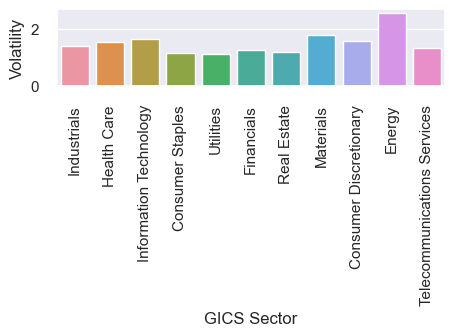

In [282]:
plt.figure(figsize=(5,1))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

### Volatility versus GICS Sector barplot

### Results:

#### Volatility versus GICS Sector:
From the Above barplot of Volatility versus GICS Sector:
- Energy had, by far, the highest volatility at over 2.5.
- Materials had the 2nd highest volatility at around just over 1.75
- Information Technology, Consumer Discretionary, and Health Care had the 3rd, 4th and 5th highest volatility scores, respectively, all over 1.5
- Industrials had the 6th highest volatility at almost 1.5.
- Telecommunications Services had the 7th highest volatility at around over 1.25.
- Financials had the 8th highest volatility at around 1.25.
- Real Estate had the 9th highest volatility of around just under 1.25.
- Consumer Staples and Utilities had the 10th and 11th highest volatility scores, respectively, both just over 1.0.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

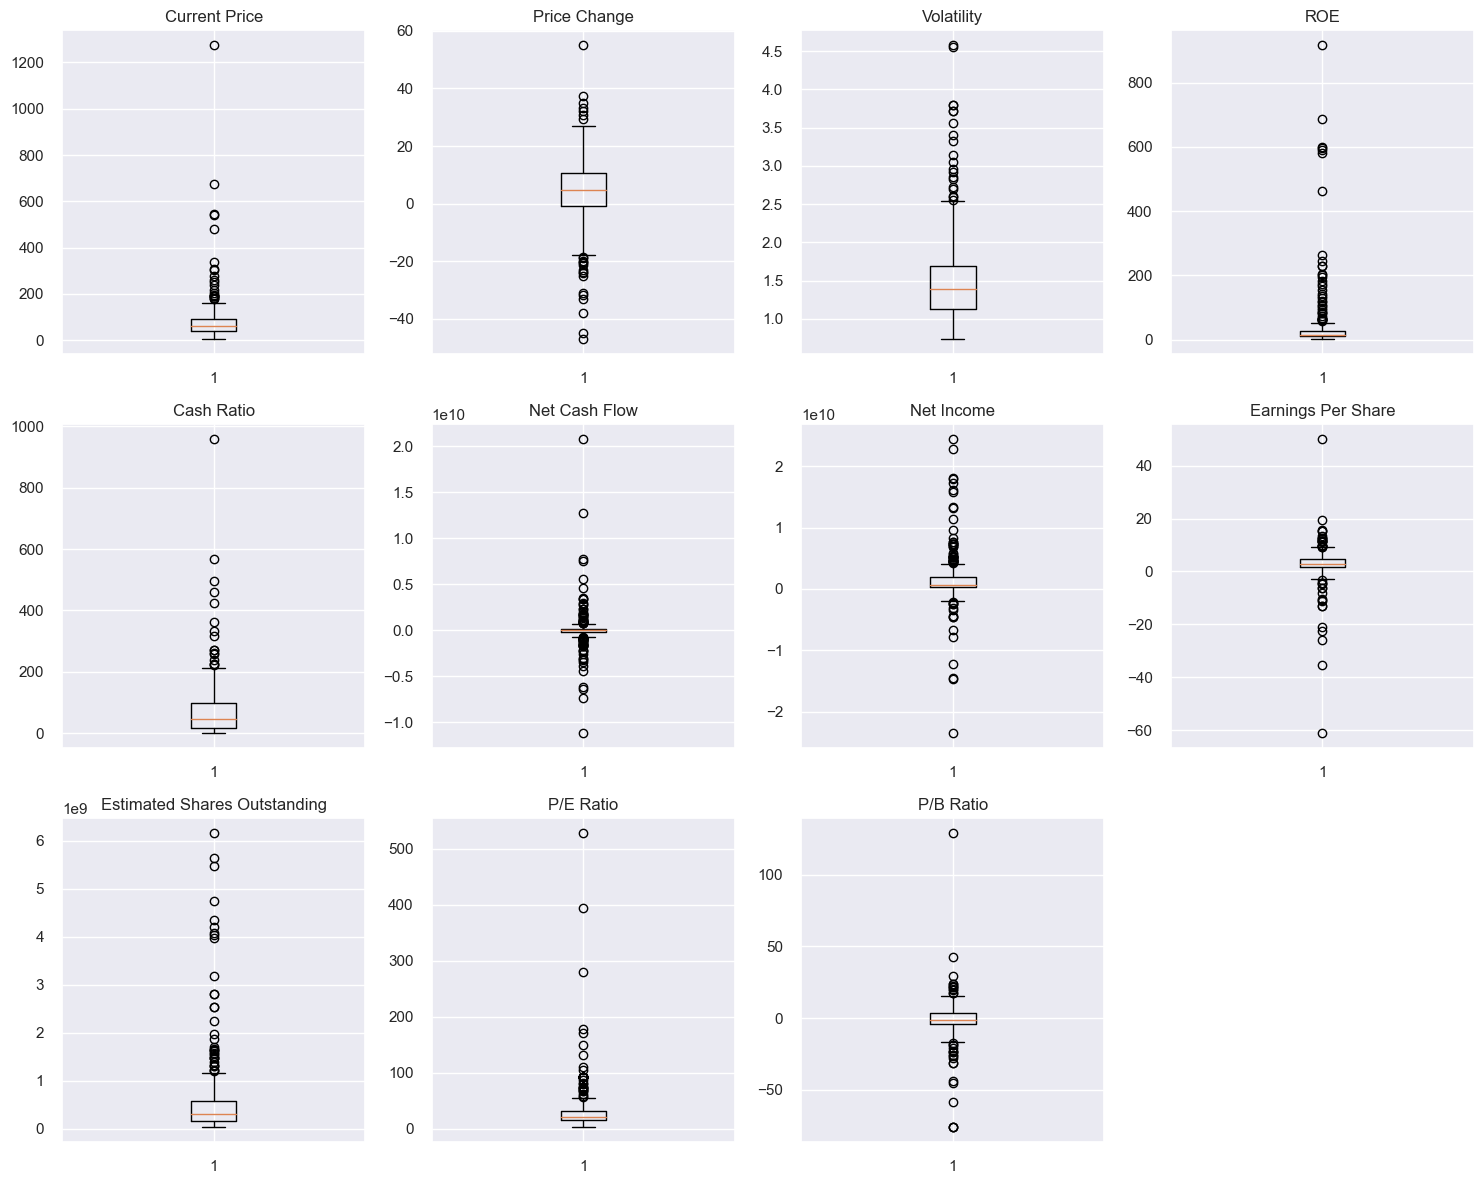

In [283]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

- class 
    - sklearn.preprocessing.StandardScaler(

        *,

        copy=True, 

        with_mean=True, 

        with_std=True
        
        )

- Standardize features by removing the mean and scaling to unit variance.

- The standard score of a sample x is calculated as:


```
        z = (x - u) / s
```

- where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using:
        - transform.

-----



[sklearn.preprocessing.StandardScaler | transform(X, copy=None)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform)

`transform(X, copy=None)`

Perform standardization by centering and scaling.

##### Parameters:

X:{array-like, sparse matrix of shape (n_samples, n_features)}

The data used to scale along the features axis.

copy : bool, default=None
Copy the input X or not.

##### Returns:

X_tr : {ndarray, sparse matrix} of shape (n_samples, n_features)

Transformed array.

-----


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.



-------------------

[sklearn.preprocessing.StandardScaler.transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform)

[Compressed Sparse formats CSR and CSC in Python](https://rrrjin.medium.com/compressed-sparse-formats-csr-and-csc-in-python-e7b86da7c58f#:~:text=Compressed%20sparse%20row%20(CSR)%20and,with%20a%20column%2Dmajor%20order.)

**Compressed sparse row (CSR)** and

**compressed sparse column (CSC)** 

- are widely known and most used formats of sparse data structures. 

- Mainly, they are used for write-once-read-many tasks.


**Compressed Sparse Column (CSC)** format is almost identical,
- except that values are indexed first 
    - by column 
        - with a column-major order. 

Usually, the **CSC** is used when there are:
- more rows than columns. 
((narrow))

On the contrary,:
- the **CSR** works better for a ‘wide’ format. So, here is an example of CSR.



- [Compressed Sparse formats CSR and CSC in Python](https://rrrjin.medium.com/compressed-sparse-formats-csr-and-csc-in-python-e7b86da7c58f#:~:text=Compressed%20sparse%20row%20(CSR)%20and,with%20a%20column%2Dmajor%20order.)


Internally, CSR is based on three NumPy arrays:

- `data` is an array of corresponding nonzero values
- `indices` is array of column indices
- `indptr` points to row starts in data and indices
~ length of `indptr` is:
    - number of rows + 1,
- last item in indptr = number of nonvalues = length of both `data` and `indices`

~ nonzero items of the i-th row are located data[indptr[i]:indptr[i+1]] with column indices indices[indptr[i]:indptr[i+1]]

If you’re new to the SciPy sparse matrix game, you might find yourself stymied by the ‘indptr’ array, which can be used to instantiate a csc_matrix or a csr_matrix object. Here I give an example to explain how to compute matrix through NumPy arrays.



[6.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.



[6.3.1. Standardization, or mean removal and variance scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

```

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

```

[6.3.1. Standardization, or mean removal and variance scaling | Continued | Sklearn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

```
>>> from sklearn import preprocessing
>>> import numpy as np
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_
array([1. ..., 0. ..., 0.33...])

>>> scaler.scale_
array([0.81..., 0.81..., 1.24...])

```


#### Attributes:

##### scale_ndarray of shape (n_features,) or None

Per feature relative scaling of the data to achieve zero mean and unit variance. Generally this is calculated using `np.sqrt(var_)`. If a variance is zero, we can’t achieve unit variance, and the data is left as-is, giving a scaling factor of 1. 

`scale_` is equal to `None` when `with_std=False`.



In [284]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [285]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [286]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


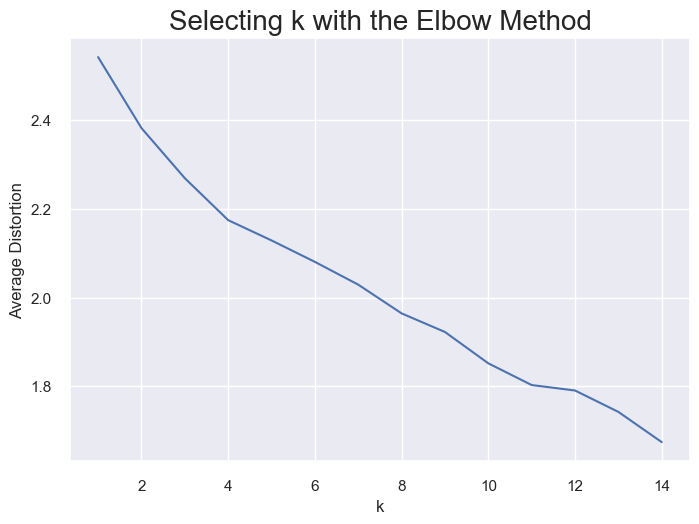

In [287]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

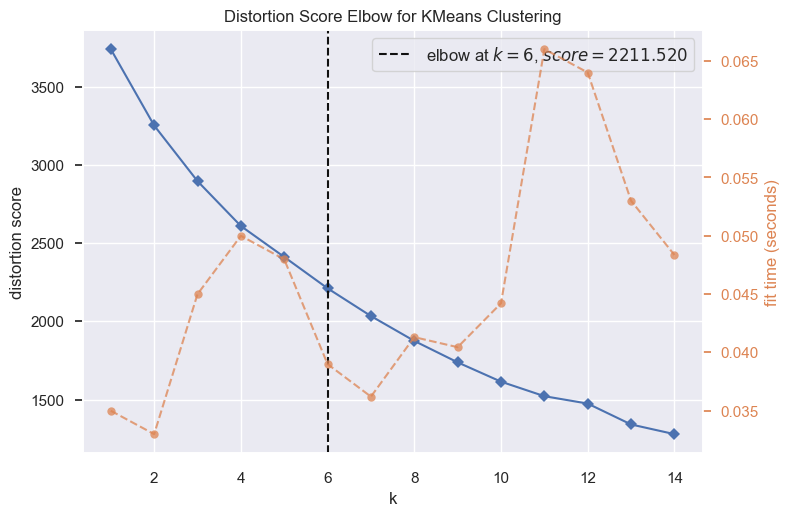

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [288]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


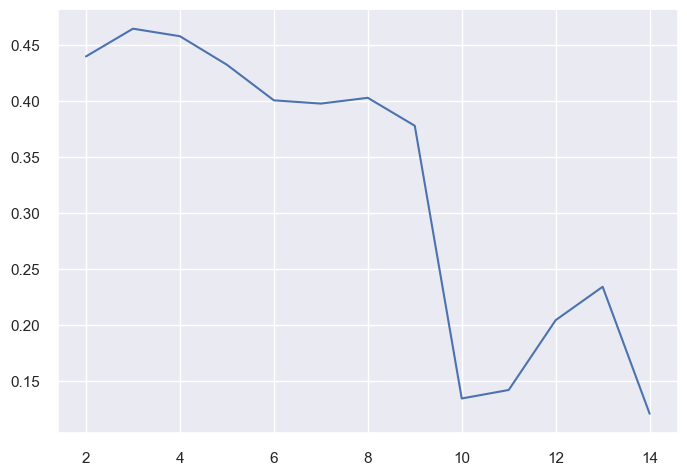

In [289]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

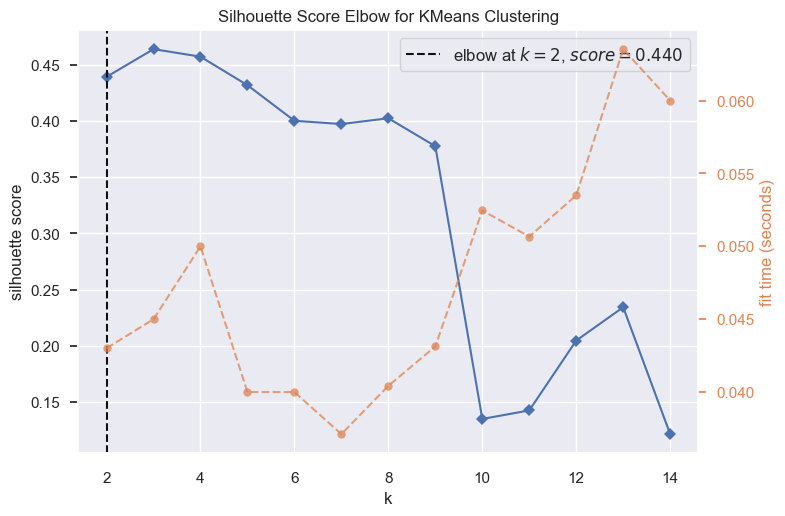

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [290]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

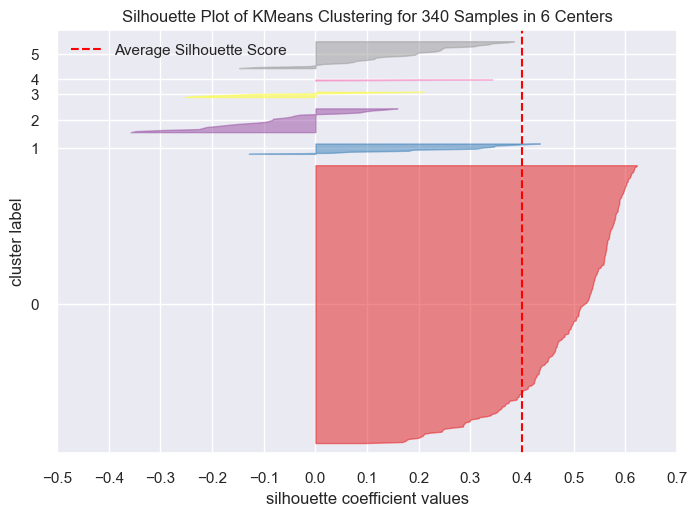

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [291]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [292]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [293]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

python boolean [or](https://www.geeksforgeeks.org/python-or-operator/)

#### Debugging:
- from previous issue [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)
- for debugging current issue: [pandas.DataFrame.to_string](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)

- **Error:** TypeError: unsupported operand type(s) for |: 'str' and 'str'

-----

**Error:** TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [295]:
df1.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')

In [296]:
df1_num_cols=[]
df1_obj_cols=[]
for iterable in df.columns:
    if (df1.columns.dtype == 'float64' or 'int64' or 'int32'):
        df1_num_cols.append(iterable)
        # print(df1.columns.dtype == 'float64' or 'int64' or 'int32')
        print(df1.columns.dtype)
        print(df1.columns)
        # print(iterable)
        # print(df1.columns.dtype)
    else:
        df1_obj_cols.append(iterable)

object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio',
       'KM_segments'],
      dtype='object')
object
Index(['Ticker Symbol

In [297]:
df1_num_cols

['Ticker Symbol',
 'Security',
 'GICS Sector',
 'GICS Sub Industry',
 'Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [298]:
df1_obj_cols

[]

[pandas.DataFrame.to_string](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)
[scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

--------------------

[pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

```
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)
df
                Max Speed
Animal Type
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0
df.groupby(level=0).mean()
        Max Speed
```
Takeaway:
- Use df, setup with index
then groupby.

In [299]:
df1.head(1)

Ticker Symbol                 Security  GICS Sector GICS Sub Industry   
0           AAL  American Airlines Group  Industrials          Airlines  \

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   
0      42.349998      9.999995    1.687151  135          51     -604000000  \

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio   
0  7610000000               11.39                   668129938.5   3.718174  \

   P/B Ratio  KM_segments  
0  -8.784219            0

In [300]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

---


---

From: 'notebooks/USL_W2_AdditionalCaseStudy_ProductSegmentation+%281%29+%281%29+%281%29.ipynb':

---

Pandas.mean() TypeError: Could not convert to numeric
https://stackoverflow.com/questions/44522741/pandas-mean-typeerror-could-not-convert-to-numeric

---

Debugging [Resolved]:
Search string: 'groupby keep strings but run mean could not convert to numeric'

`data.groupby('month', as_index=False).agg({"duration": "sum"})` [Use Pandas Groupby to Group and Summarise DataFrames](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

solution: 

groupby all string columns

as follows:

---

but first:

---

Debugging[Resolved]:

search string: `groupby ValueError: 2`

[Pandas groupby throwing up ValueError](https://stackoverflow.com/questions/64039934/pandas-groupby-throwing-up-valueerror)

- [pandas.core.groupby.DataFrameGroupBy.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

Solution:

Remove:

`, as_index=False`

from 

`.groupby()` passed into method call

---

In [301]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [302]:
df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"])

In [303]:
df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()

Current Price   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                                
0           AAL           American Airlines Group   Industrials            Airlines                                             42.349998  \
            ABBV          AbbVie                    Health Care            Pharmaceuticals                                      59.240002   
            ABT           Abbott Laboratories       Health Care            Health Care Equipment                                44.910000   
            ADM           Archer-Daniels-Midland Co Consumer Staples       Agricultural Products                                36.680000   
            AEE           Ameren Corp               Utilities              MultiUtilities                                       43.230000   
...                                                                                                                                   ...   
5           SE            Spectra Energy Corp.      Energy                 Oil & Gas Refining & Marketing & Transportation      23.940001   
            SWN           Southwestern Energy       Energy                 Oil & Gas Exploration & Production                    7.110000   
            TDC           Teradata Corp.            Information Technology Application Software                                 26.420000   
            WMB           Williams Cos.             Energy                 Oil & Gas Exploration & Production                   25.700001   
            XEC           Cimarex Energy            Energy                 Oil & Gas Exploration & Production                   89.379997   

                                                                                                                            Price Change   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                               
0           AAL           American Airlines Group   Industrials            Airlines                                             9.999995  \
            ABBV          AbbVie                    Health Care            Pharmaceuticals                                      8.339433   
            ABT           Abbott Laboratories       Health Care            Health Care Equipment                               11.301121   
            ADM           Archer-Daniels-Midland Co Consumer Staples       Agricultural Products                              -12.017268   
            AEE           Ameren Corp               Utilities              MultiUtilities                                       2.174424   
...                                                                                                                                  ...   
5           SE            Spectra Energy Corp.      Energy                 Oil & Gas Refining & Marketing & Transportation     -9.898378   
            SWN           Southwestern Energy       Energy                 Oil & Gas Exploration & Production                 -44.798137   
            TDC           Teradata Corp.            Information Technology Application Software                                -8.833678   
            WMB           Williams Cos.             Energy                 Oil & Gas Exploration & Production                 -30.988186   
            XEC           Cimarex Energy            Energy                 Oil & Gas Exploration & Production                 -14.403372   

                                                                                                                            Volatility   
KM_segments Ticker Symbol Security                  GICS Sector            GICS Sub Industry                                             
0           AAL           American Airlines Group   Industrials            Airlines                                           1.687151  \
            ABBV          AbbVie                    Hea

In [304]:
km_cluster_profile = df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()  ## Complete the code to groupby the cluster labels

In [305]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby(["KM_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"])["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [306]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [307]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [308]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

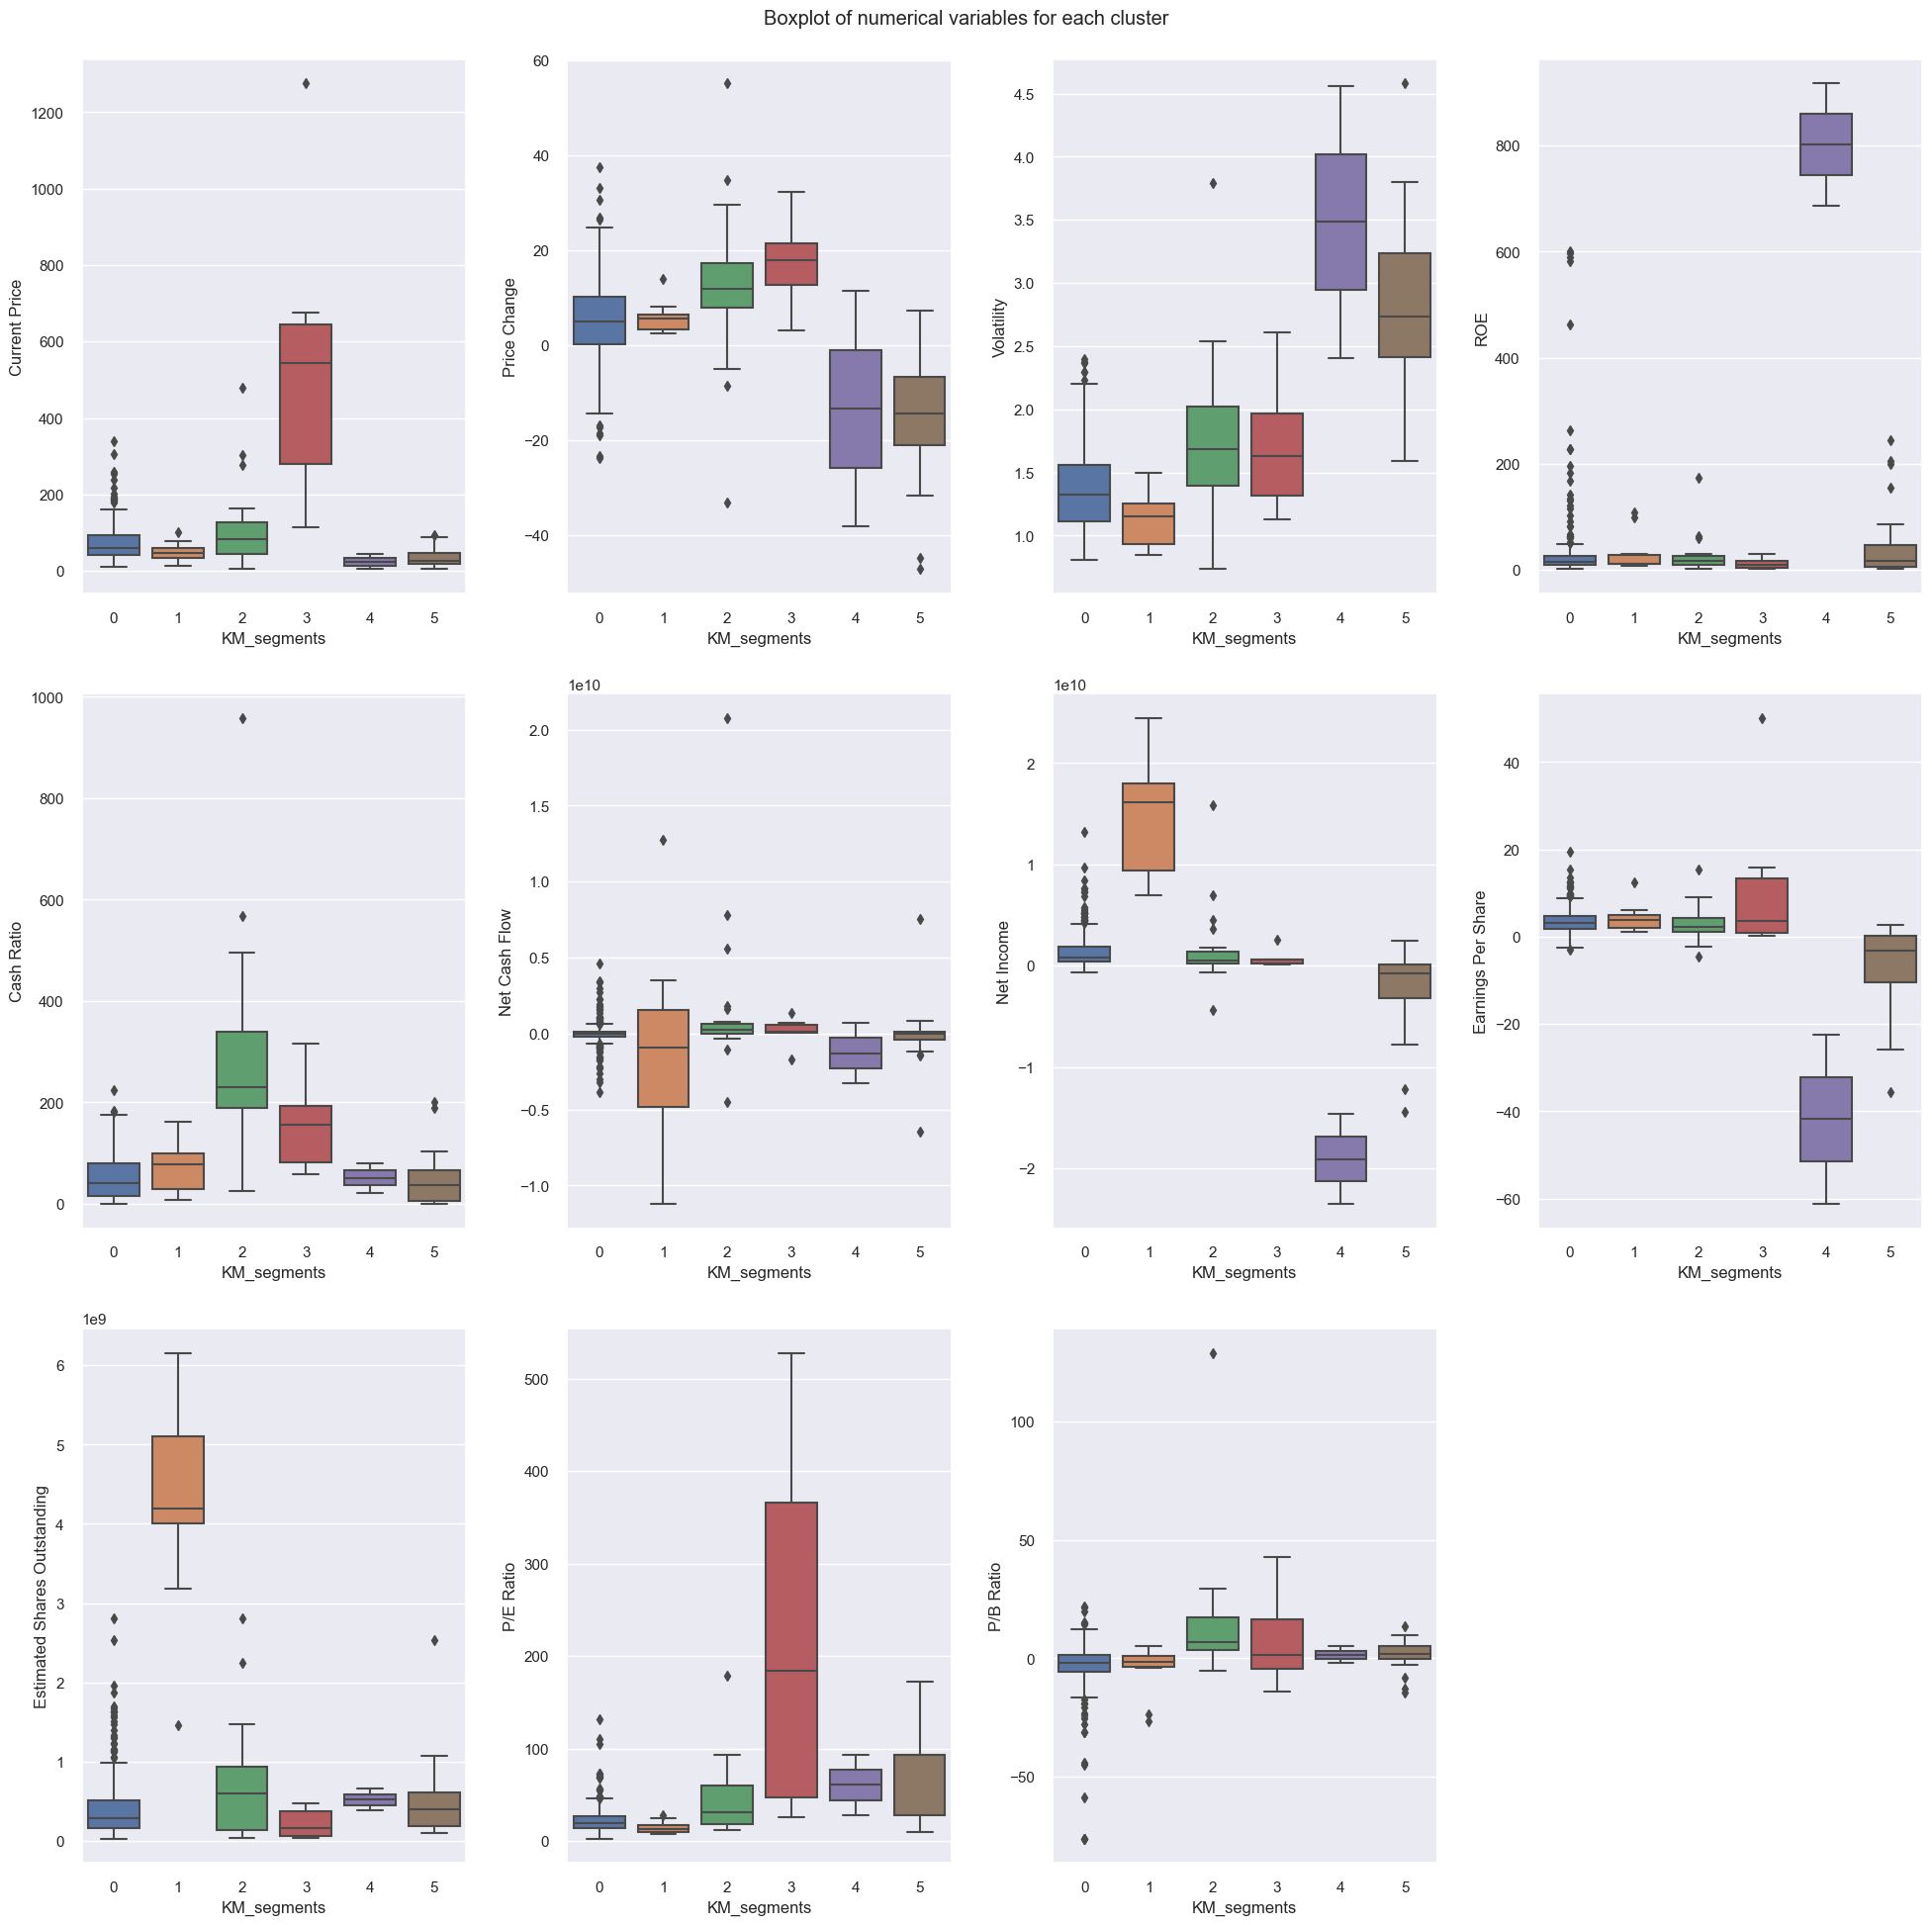

In [309]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- 


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [310]:
hc_df = subset_scaled_df.copy()

Error: `ValueError: The condensed distance matrix must contain only finite values.`

Reference: [ValueError: The condensed distance matrix must contain only finite values. in python](https://stackoverflow.com/questions/68039205/valueerror-the-condensed-distance-matrix-must-contain-only-finite-values-in-py)

Quote: `There are question marks in your input dataset`

In [311]:
hc_df

Current Price  Price Change  Volatility       ROE  Cash Ratio   
0        -0.393341      0.493950    0.272749  0.989601   -0.210698  \
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net Cash Flow  Net Income  Earnings Per Share   
0        -0.339355    1.554415            1.309399  \
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                        0.107863  -0.652487  -0.506653  
1                        1.250274  -0.311769  -0.504205  
2                        1.098021  -0.391502   0.094941  
3                       -0.091622   0.947148   0.424333  
4                        1.978399   3.293307   0.199196  
..                            ...        ...        ...  
335                      0.429111  -0.082116   0.572194  
336                     -0.167741  -0.337154  -0.152012  
337                     -0.460058   2.233634  -1.589390  
338                     -0.377852  -0.222714   0.118680  
339                     -0.092942   0.854902   0.246754  

[340 rows x 11 columns]

In [312]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    float64
 4   Cash Ratio                    340 non-null    float64
 5   Net Cash Flow                 340 non-null    float64
 6   Net Income                    340 non-null    float64
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(11)
memory usage: 29.3 KB


[pandas.isna](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#:~:text=isna,-pandas.&text=Detect%20missing%20values%20for%20an,arrays%2C%20NaT%20in%20datetimelike\)\.)

In [313]:
hc_df.isna()

Current Price  Price Change  Volatility    ROE  Cash Ratio   
0            False         False       False  False       False  \
1            False         False       False  False       False   
2            False         False       False  False       False   
3            False         False       False  False       False   
4            False         False       False  False       False   
..             ...           ...         ...    ...         ...   
335          False         False       False  False       False   
336          False         False       False  False       False   
337          False         False       False  False       False   
338          False         False       False  False       False   
339          False         False       False  False       False   

     Net Cash Flow  Net Income  Earnings Per Share   
0            False       False               False  \
1            False       False               False   
2            False       False               False   
3            False       False               False   
4            False       False               False   
..             ...         ...                 ...   
335          False       False               False   
336          False       False               False   
337          False       False               False   
338          False       False               False   
339          False       False               False   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                           False      False      False  
1                           False      False      False  
2                           False      False      False  
3                           False      False      False  
4                           False      False      False  
..                            ...        ...        ...  
335                         False      False      False  
336                         False      False      False  
337                         False      False      False  
338                         False      False      False  
339                         False      False      False  

[340 rows x 11 columns]

In [314]:
len(hc_df[col])

340

In [315]:
type(len(hc_df[col]))

int

In [316]:
hc_df.columns

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [317]:
count=0
for col in hc_df.columns:
    for i in range(len(hc_df[col])):
        if pd.isna(hc_df[col][i])==True:
            count+=1
    print("count of na's in col:", col, "is:")
    print(count)
    count=0

count of na's in col: Current Price is:
0
count of na's in col: Price Change is:
0
count of na's in col: Volatility is:
0
count of na's in col: ROE is:
0
count of na's in col: Cash Ratio is:
0
count of na's in col: Net Cash Flow is:
0
count of na's in col: Net Income is:
0
count of na's in col: Earnings Per Share is:
0
count of na's in col: Estimated Shares Outstanding is:
0
count of na's in col: P/E Ratio is:
0
count of na's in col: P/B Ratio is:
0


In [318]:
len(hc_df)

340

#### Bug finite values for jensenshannon distance metric with linkage and cophenet: [Workaround]:

error: ValueError: The condensed distance matrix must contain only finite values.

workaround: remove jensenshannon distance_metric

(see next code cell below:)

In [319]:
# list of distance metrics

# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

# excluded `"jensenshannon", ` due to: 
# error: ValueError: The condensed distance matrix must contain only finite values.
# https://github.com/SegataLab/hclust2/issues/3
# https://github.com/CoderSales/unsupervised-learning-clustering/issues/7


distance_metrics = ["braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine", "euclidean", "mahalanobis", "minkowski", "seuclidean", "sqeuclidean"] ## Complete the code to add distance metrics

# list of linkage methods

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

# 'ward' excluded due to error:
# ValueError: Method 'ward' requires the distance metric to be Euclidean

linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# distance_metrics = ["braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine", "euclidean", "jensenshannon", "mahalanobis", "minkowski", "seuclidean", "sqeuclidean"] ## Complete the code to add distance metrics
# linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages
# gave error:
# ValueError: The condensed distance matrix must contain only finite values.

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Braycurtis distance and single linkage is 0.5212071810658095.
Cophenetic correlation for Braycurtis distance and complete linkage is 0.10240430426791322.
Cophenetic correlation for Braycurtis distance and average linkage is 0.32627435525839565.
Cophenetic correlation for Braycurtis distance and weighted linkage is 0.20642920853912072.
Cophenetic correlation for Canberra distance and single linkage is 0.3154284565587037.
Cophenetic correlation for Canberra distance and complete linkage is 0.12703984768895782.
Cophenetic correlation for Canberra distance and average linkage is 0.28553906567883447.
Cophenetic correlation for Canberra distance and weighted linkage is 0.1626519582860221.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic corr

In [320]:
high_cophenet_corr

0.9422540609560816

In [321]:
high_dm_lm[0]

'seuclidean'

In [322]:
high_dm_lm[1]

'average'

Note on above 3 code cells

post main code cell for cophenet:

scope for variables:
- `high_cophenet_corr`
- `high_dm_lm[0]`
- `high_dm_lm[1]`

in print statement:

```
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)
```

must be code cell scope,

hence unavailable in new cells

hence 0's for last 3 cell outputs.

**Let's explore different linkage methods with Euclidean distance only.**

In [323]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

Estimated runtime around: ~17.9-28.1 s

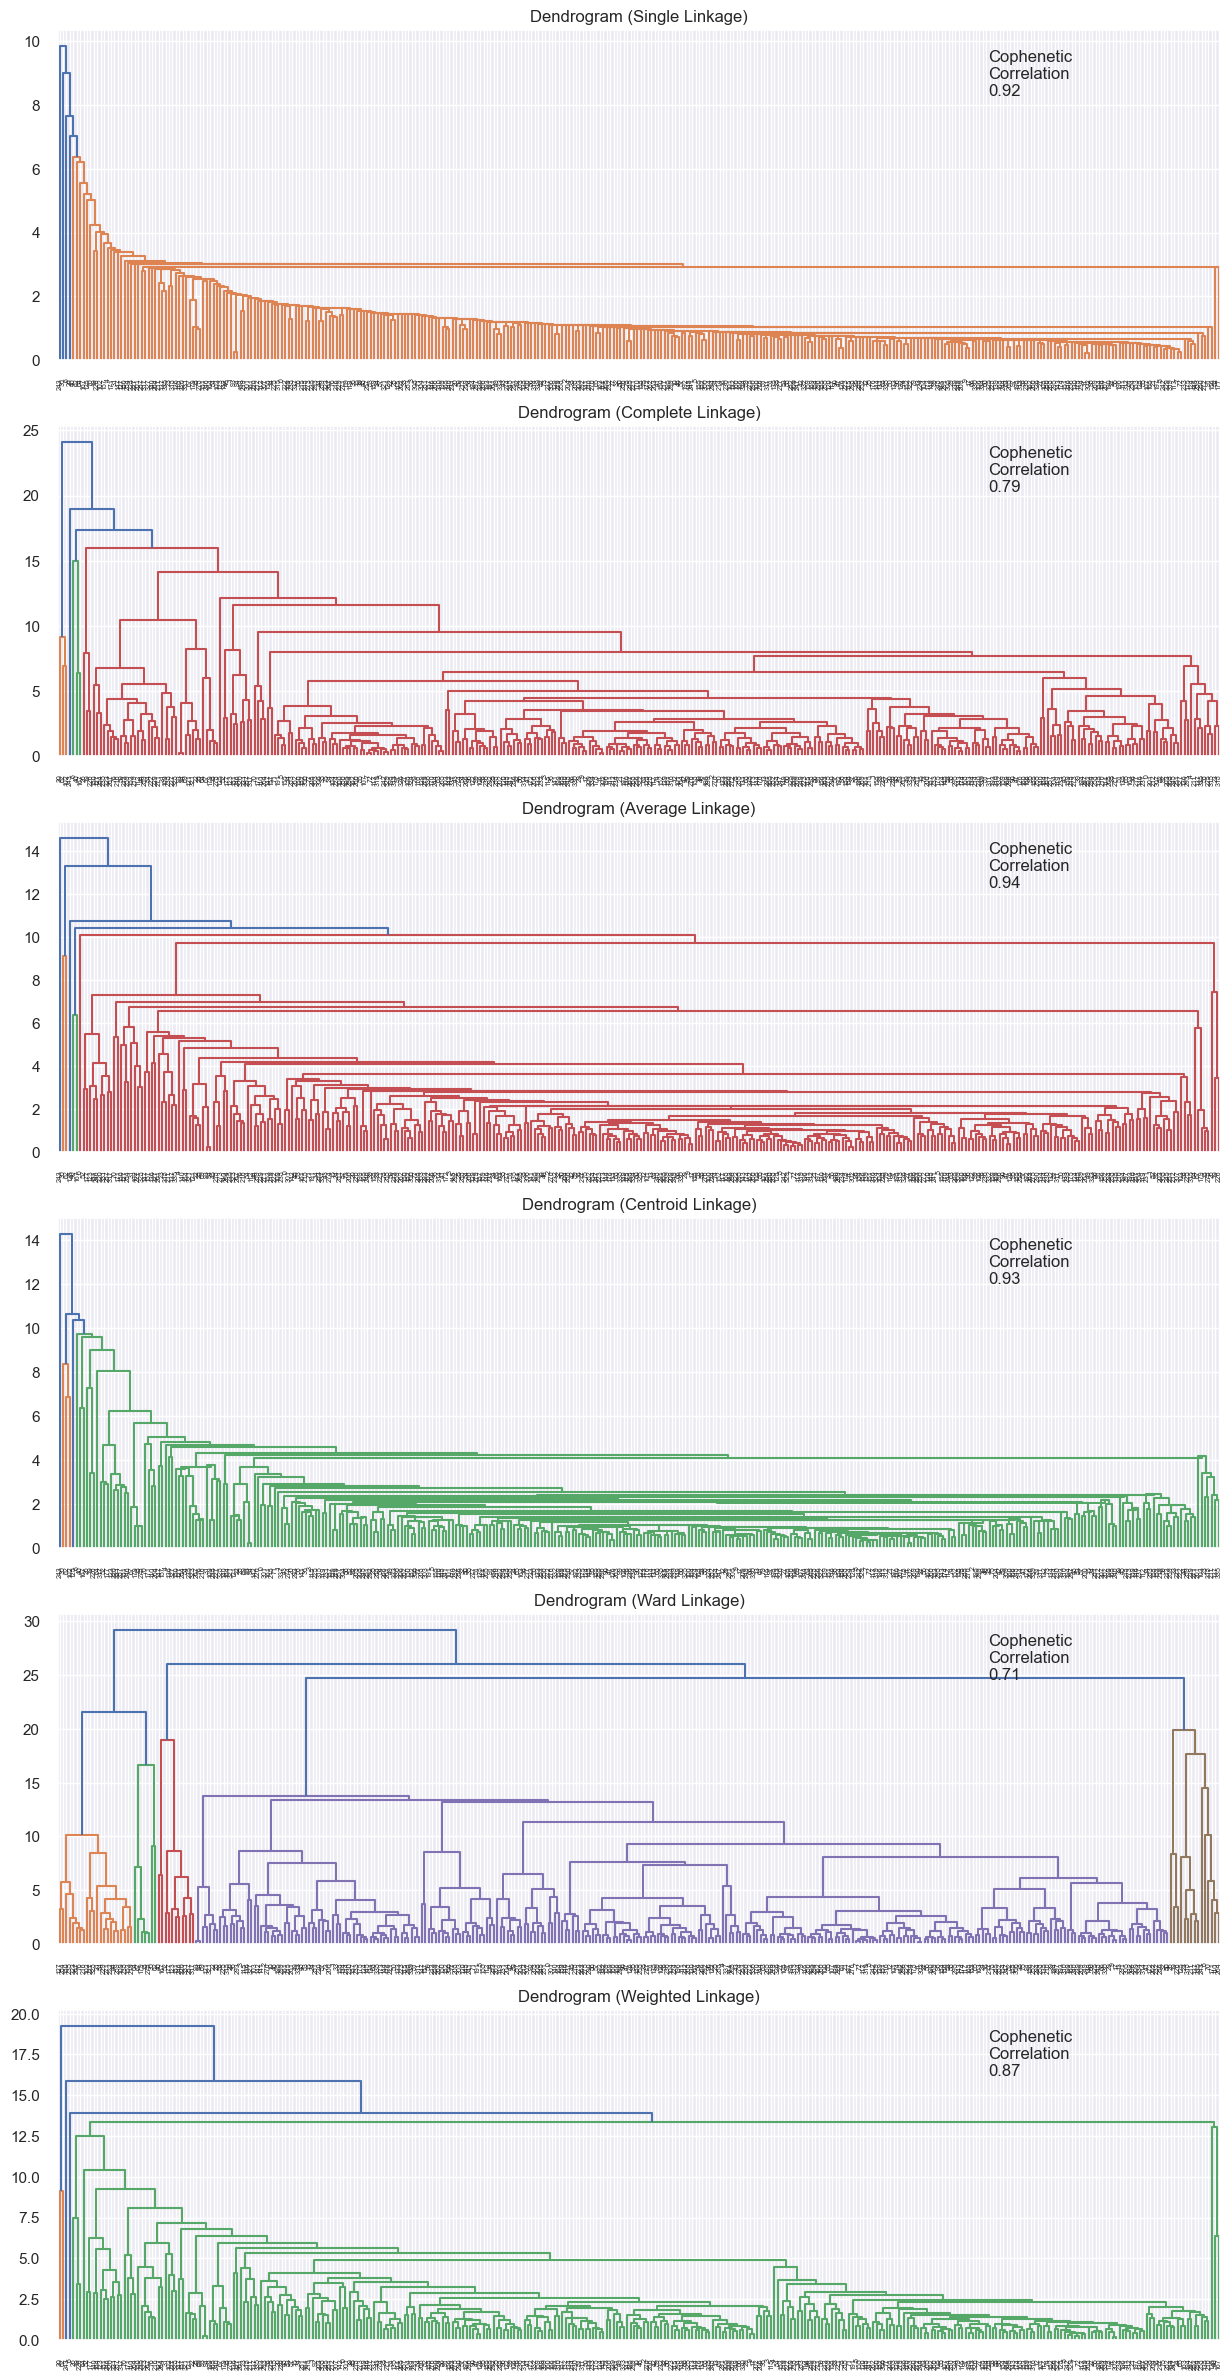

In [324]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [325]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn

abbreviation: hc = hierarchical clustering

reference: [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

In [326]:
HCmodel = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=1)

In [327]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

error: `TypeError: Could not convert to numeric`

In [328]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [329]:
hc_cluster_profile = df2.groupby(["HC_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]).mean()  ## Complete the code to groupby the cluster labels

groupby: `["HC_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"]`
- Hierarchical clustering segments
- and 4 object column titles
- passed as strings into list
- passed into groupby

#### Debugging:

to fix bug:

no companies in groups / clusters when grouped by 'GICS Sub Industry',

(below, after large hc_cluster_profile output table below),

do not group by all object columns as well as by HC_segments

(that is Hierarchical Clustering segments)

object_list contains all object columns:

In [330]:
object_list

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']

In [331]:
# hc_cluster_profile["count_in_each_segment"] = (
#     df2.groupby(["HC_segments", "Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"])["Security"].count().values  ## Complete the code to groupby the cluster labels
# )

In [332]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby(["HC_segments", 'Ticker Symbol', 'Security', 'GICS Sector', "GICS Sub Industry"])["GICS Sub Industry"].count().values  ## Complete the code to groupby the cluster labels
)

In [333]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [391]:
max_df=hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [400]:
type(max_df)

pandas.io.formats.style.Styler

```
You can retrieve the original dataframe from the styler object using the "data" attribute.

In your example:

df = final_df.data

type(df) yields

pandas.core.frame.DataFrame

```

[Is there a way to convert data frame styler object into dataframe in python](https://stackoverflow.com/questions/55257121/is-there-a-way-to-convert-data-frame-styler-object-into-dataframe-in-python)

In [399]:
for col in max_df.columns:
    # for i in max_df[col]:
    print(col)

Current Price
Price Change
Volatility
ROE
Cash Ratio
Net Cash Flow
Net Income
Earnings Per Share
Estimated Shares Outstanding
P/E Ratio
P/B Ratio
count_in_each_segment


In [394]:
for col in max_df.columns:
    for i in max_df[col]:
        if max_df[col][i] == max_df[col]:
            print(max_df[col][i])

TypeError: 'Styler' object is not subscriptable

- loop through each unique 'Ticker Symbol' in df2 and
- print result of comparison between df2 df2 'Ticker Symbol' and c1 "Security" .unique()

In [334]:
## Complete the code to print the companies in each cluster
for cl in df2['Ticker Symbol'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2['Ticker Symbol'] == cl]["Security"].unique())
    print()

In cluster AAL, the following companies are present:
['American Airlines Group']

In cluster ABBV, the following companies are present:
['AbbVie']

In cluster ABT, the following companies are present:
['Abbott Laboratories']

In cluster ADBE, the following companies are present:
['Adobe Systems Inc']

In cluster ADI, the following companies are present:
['Analog Devices, Inc.']

In cluster ADM, the following companies are present:
['Archer-Daniels-Midland Co']

In cluster ADS, the following companies are present:
['Alliance Data Systems']

In cluster AEE, the following companies are present:
['Ameren Corp']

In cluster AEP, the following companies are present:
['American Electric Power']

In cluster AFL, the following companies are present:
['AFLAC Inc']

In cluster AIG, the following companies are present:
['American International Group, Inc.']

In cluster AIV, the following companies are present:
['Apartment Investment & Mgmt']

In cluster AIZ, the following companies are present:
['

Edit

the following cell

to print

df2[df2['GICS Sub Industry'] == c1]["Security"].unique()

Cluster / Group by 'GICS Sub Industry':

In [335]:
## Failed Attempt to group by df2['GICS Sub Industry'].unique()
## Duplicated from previous cell:
## Complete the code to print the companies in each cluster
for cl in df2['GICS Sub Industry'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2['GICS Sub Industry'] == cl]["Security"].unique())
    print()

In cluster Airlines, the following companies are present:
['American Airlines Group' 'Alaska Air Group Inc' 'Delta Air Lines'
 'Southwest Airlines' 'United Continental Holdings']

In cluster Pharmaceuticals, the following companies are present:
['AbbVie' 'Lilly (Eli) & Co.' 'Merck & Co.' 'Mylan N.V.' 'Pfizer Inc.'
 'Zoetis']

In cluster Health Care Equipment, the following companies are present:
['Abbott Laboratories' 'Baxter International Inc.' 'Bard (C.R.) Inc.'
 'Boston Scientific' 'Edwards Lifesciences' 'IDEXX Laboratories'
 'Intuitive Surgical Inc.' 'Stryker Corp.' 'Thermo Fisher Scientific'
 'Varian Medical Systems' 'Zimmer Biomet Holdings']

In cluster Application Software, the following companies are present:
['Adobe Systems Inc' 'Teradata Corp.']

In cluster Semiconductors, the following companies are present:
['Analog Devices, Inc.' 'Broadcom' 'First Solar Inc' 'Intel Corp.'
 'Skyworks Solutions' 'Texas Instruments']

In cluster Agricultural Products, the following companies 

In [336]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         40
             Consumer Staples               19
             Energy                         30
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
Name: Security, dtype: int64

#### Attempt to get matplotlib pyplot figure numbers

##### matplotlib pyplot font size
```
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
```
Reference: [How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)

##### how to get plt number
`plt.gcf().number` [How do you get the current figure number in Python's matplotlib?](https://stackoverflow.com/questions/42322986/how-do-you-get-the-current-figure-number-in-pythons-matplotlib)

In [346]:
plt.gcf().number

1

<Figure size 800x550 with 0 Axes>

[Get the list of figures in Matplotlib](https://www.tutorialspoint.com/get-the-list-of-figures-in-matplotlib)

In [348]:
plt.get_fignums()

[]

[How to get subplots of matplotlib Figure?](https://stackoverflow.com/questions/45041503/how-to-get-subplots-of-matplotlib-figure)

In [349]:
allaxes = fig.get_axes()

In [350]:
allaxes

[<Axes: title={'center': 'Dendrogram (Single Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Complete Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Average Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Centroid Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Ward Linkage)'}>,
 <Axes: title={'center': 'Dendrogram (Weighted Linkage)'}>]

```
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
```
[How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)

In [390]:
# unused:
# https://stackoverflow.com/questions/49572582/distplot-got-an-unexpected-keyword-argument-figsize
# Solves figsize:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# plt.figure(figsize=(3,3))
# ax=plt.subplot(111, title='title')
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(9)
# plt.subplot(figsize=(4,4))

In [389]:
# ax=plt.subplot(title='title')
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(20)


fix bug: adjust text size:

- save boxplot to ax var for each of 11 subplots 
- set_fontsize to 15 for each subplot

as follows:

replace:

`ax=sns.boxplot(data=df2, x="HC_segments", y=variable)`

with:

```
ax=sns.boxplot(data=df2, x="HC_segments", y=variable)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
```

1

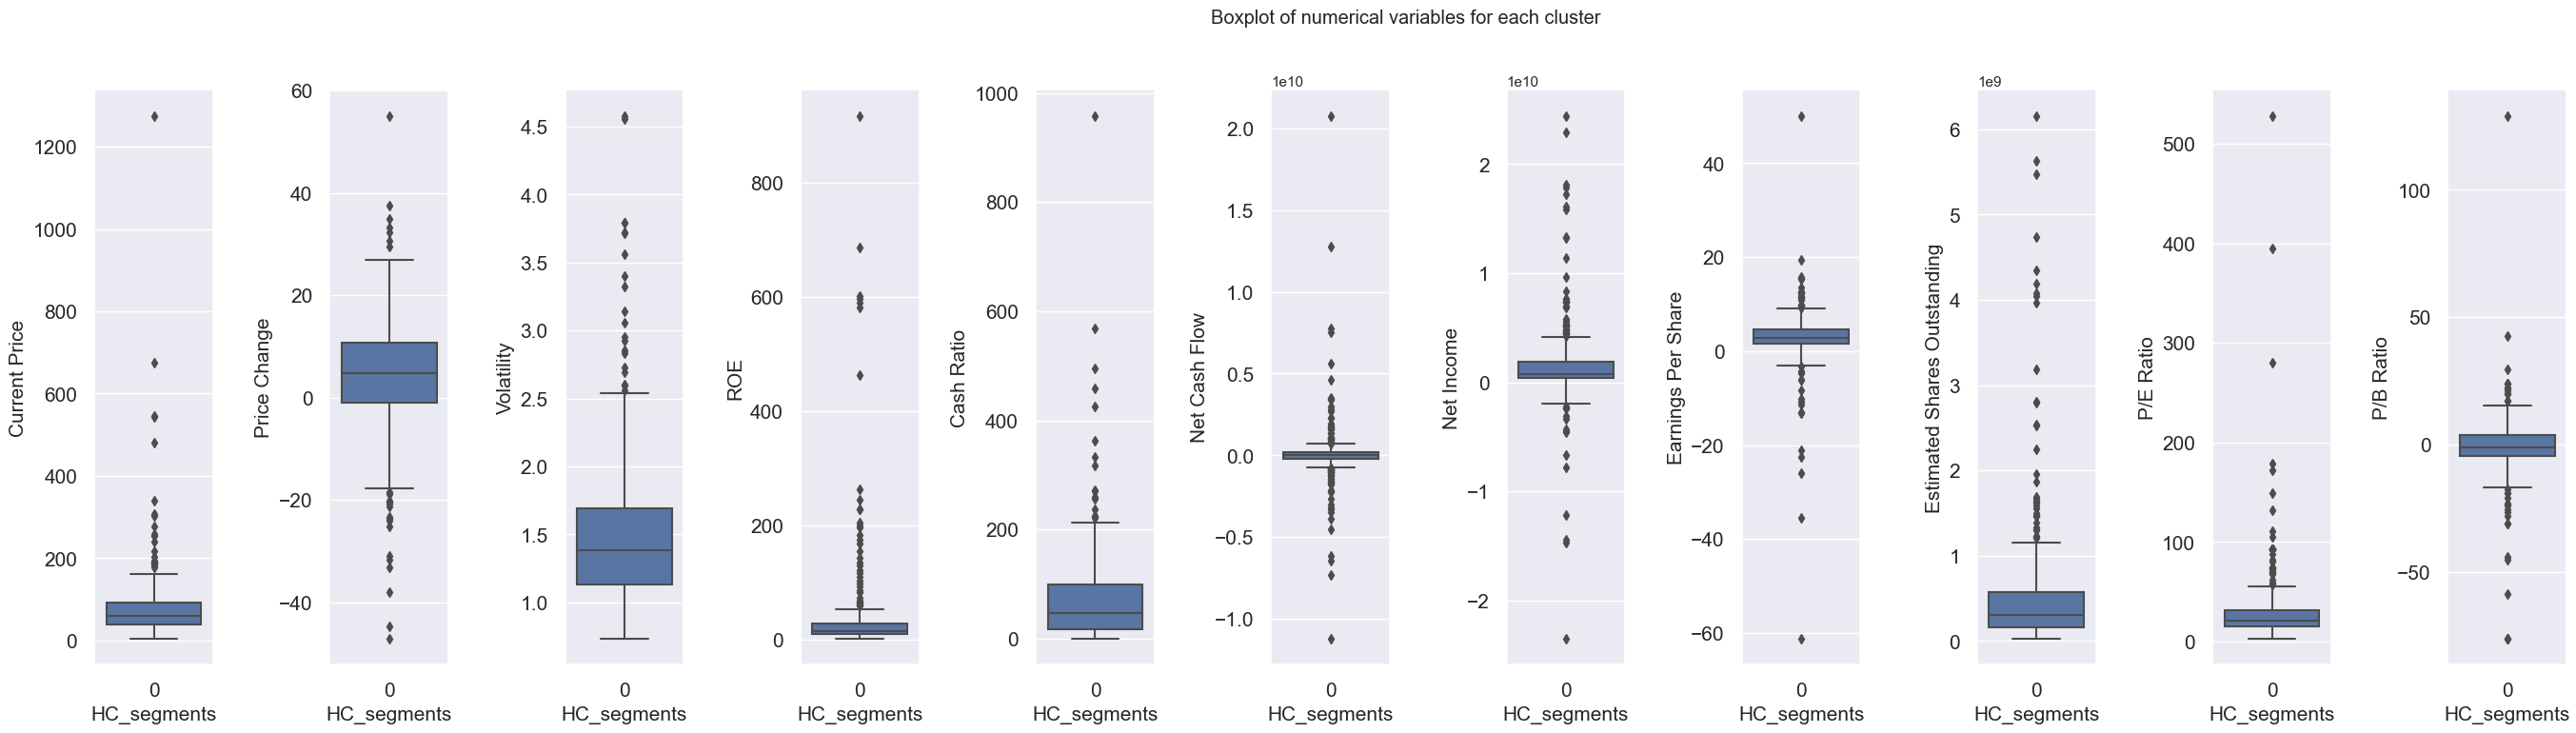

In [388]:
plt.figure(figsize=(30, 8))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(1, 12, i + 1)
    ax=sns.boxplot(data=df2, x="HC_segments", y=variable)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

plt.tight_layout(pad=2.0)
plt.gcf().number

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

##### Technical Overview:
Estimated Notebook Runtime: 2m 19s

## Actionable Insights and Recommendations

- It is assumed that the dataset given contains simulated stock prices, or prices cherry-picked from different times, rather than real prices taken from a single time period for the following reasons:
1. Upon analyzing the first 10 stocks (AAL to AFL) in the dataset, no time period in history could be found using Google Finance for which the stock prices mentioned would coincide.
2. Alliance Data Systems (ADS in stock_data.csv dataset) (now Bread Financial NYSE: BFH, since: [23 Mar 2022](https://finance.yahoo.com/news/alliance-data-now-bread-financial-161109983.html)) never reached the Price of $276.570007 given in the dataset, with the max actually achieved of about $245.23 on around 24 April 2015.
3. For the stocks AAL to ADM: in order for prices to be roughly in range: the pricing period would have to be in the window from 2004 to 2016.
4. AFLAC Inc (AFL) only had the possibility of being in a price range containing $58.27 after June 2017.
5. Thus, from process of elimination, since the 2 time ranges: (2004 to 2016), and, (post June 2017) are mutually exclusive, the stock prices given are not real prices taken from a single time period in history.

- Therefore, in order to provide real predictive power for real prices in terms of buying and selling stocks and actionable insights and recommendations on same, the dataset used would have to be substituted with actual historic stock data from a single time range.



___

### For the purposes of this project:
